In [1]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [2]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.49 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 15.6 GB RAM, 4437.1/8062.4 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
%cd {HOME}

# # !pip install roboflow

# # from roboflow import Roboflow
# # rf = Roboflow(api_key="rnnyAH7McMcL8AChKhns")
# # project = rf.workspace("fracture-uofxm").project("bone-fracture-4wdzo")
# # dataset = project.version(1).download("yolov8")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rnnyAH7McMcL8AChKhns")
project = rf.workspace("fracture-uofxm").project("bone-fracture-detection-ivsy6")
dataset = project.version(1).download("yolov8")


/kaggle/working
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=5f6b1ee7ce6a5de903e405b43ce607a5c541c4934601990db2b33acad533c69b
  Stored in directory: /root/.cache/pip/wheels/e1/e8/db/ebe4dcd7d7d11208c1e4e4ef246cea4fcc8d463c93405a6555
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      

Extracting Dataset Version Zip to Bone-fracture-detection-1 in yolov8:: 100%|██████████| 2084/2084 [00:00<00:00, 4113.86it/s]


In [5]:
%cd {HOME}

# !yolo task=detect mode=train model=yolov8s.pt  data={dataset.location}/data.yaml epochs=300 imgsz=350

!yolo task=detect mode=train model=yolov8l.pt batch=32 data={dataset.location}/data.yaml epochs=300 imgsz=350

/kaggle/working
100%|██████████████████████████████████████| 83.7M/83.7M [00:01<00:00, 45.2MB/s]
Ultralytics YOLOv8.0.49 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/kaggle/working/Bone-fracture-detection-1/data.yaml, epochs=300, patience=50, batch=32, imgsz=350, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=F

In [6]:
!ls {HOME}/runs/detect/train/

F1_curve.png					   results.png
PR_curve.png					   train_batch0.jpg
P_curve.png					   train_batch1.jpg
R_curve.png					   train_batch2.jpg
args.yaml					   val_batch0_labels.jpg
confusion_matrix.png				   val_batch0_pred.jpg
events.out.tfevents.1678031685.0cc6ed0c0180.144.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   weights
results.csv


/kaggle/working


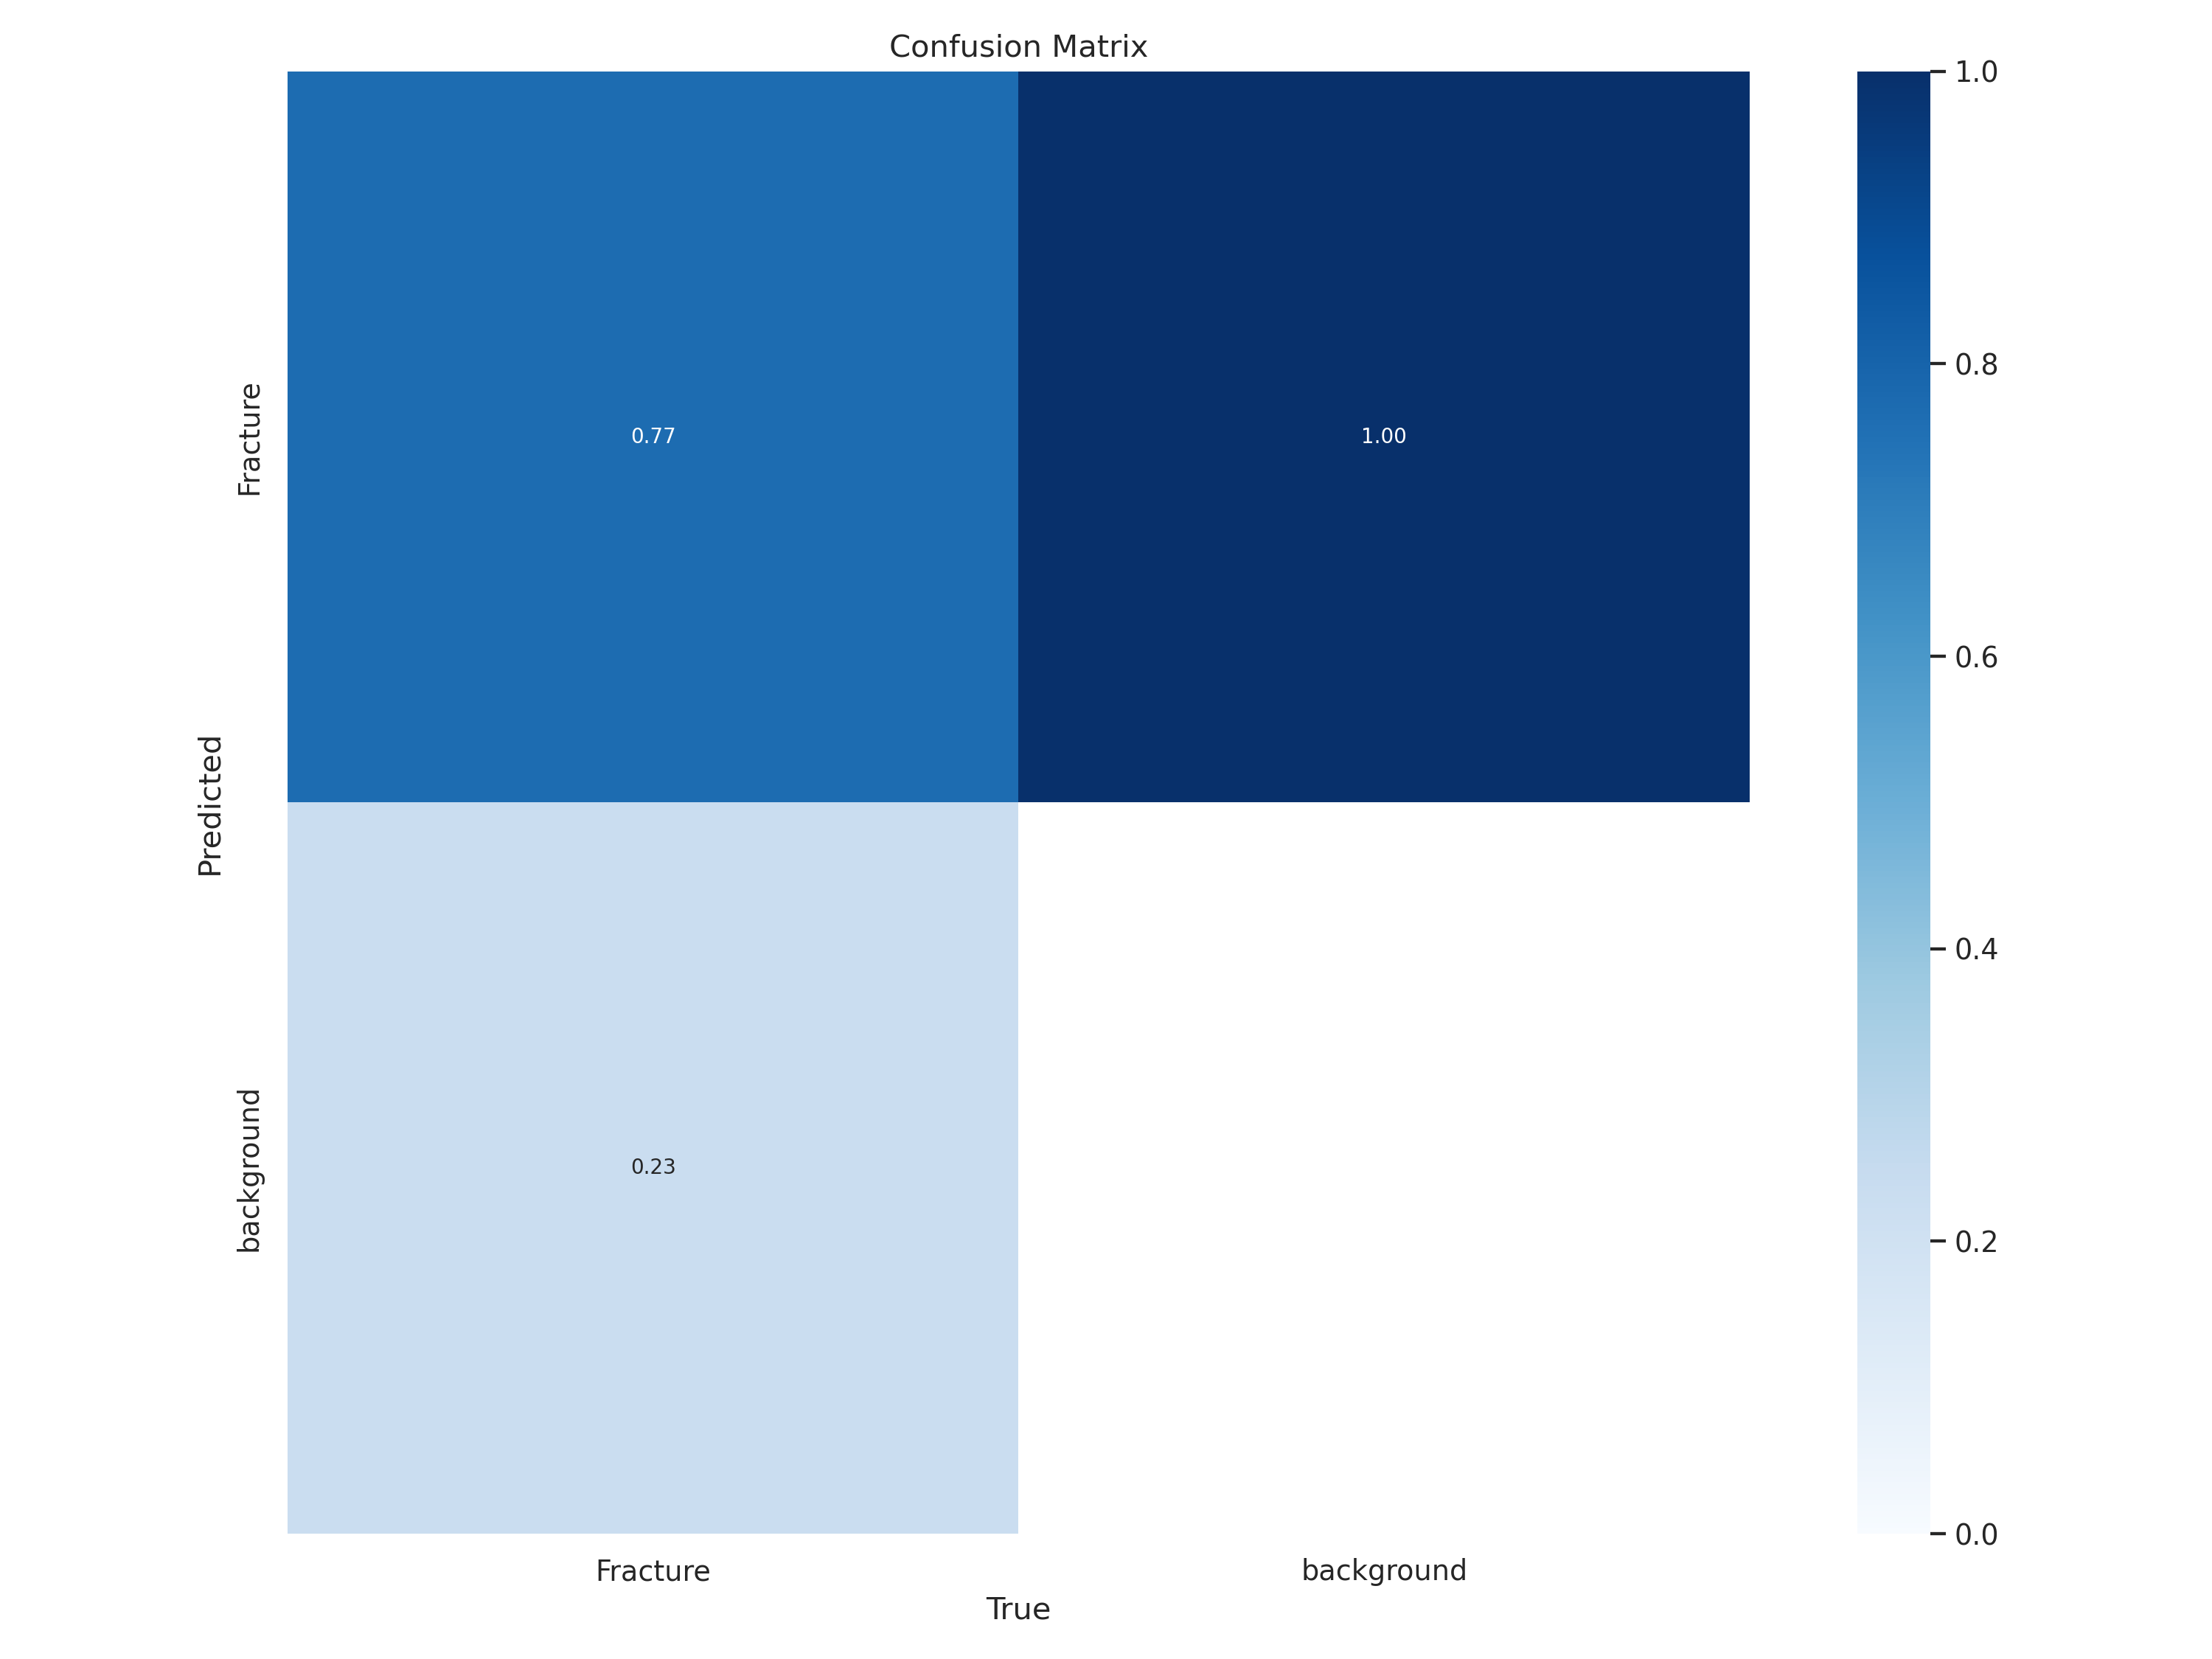

In [7]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png',width=600)

/kaggle/working


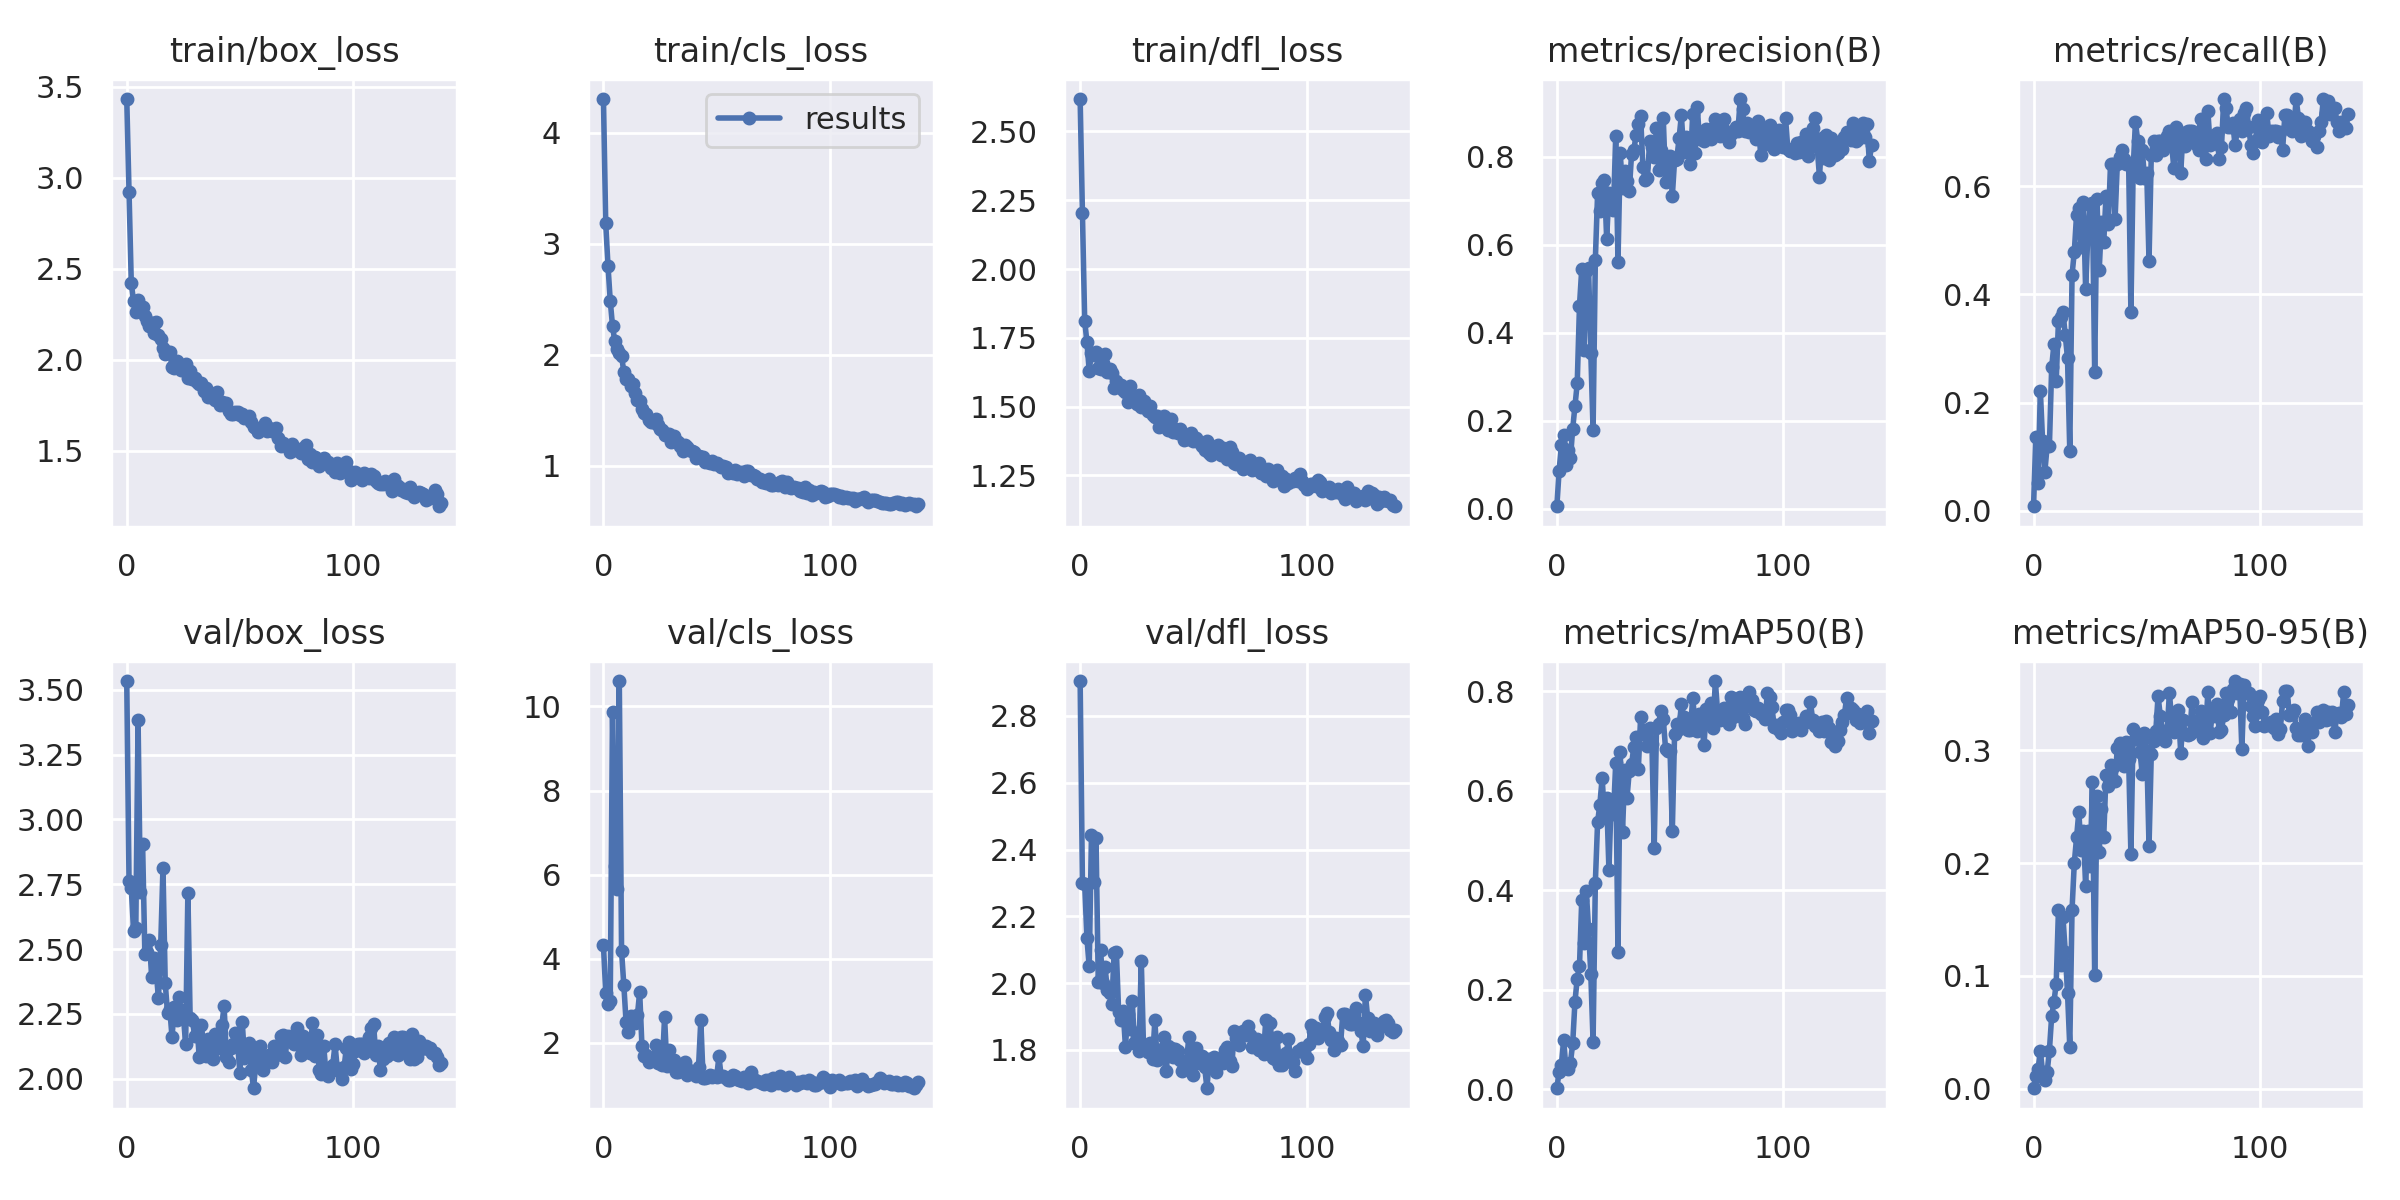

In [8]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png',width=600)

/kaggle/working


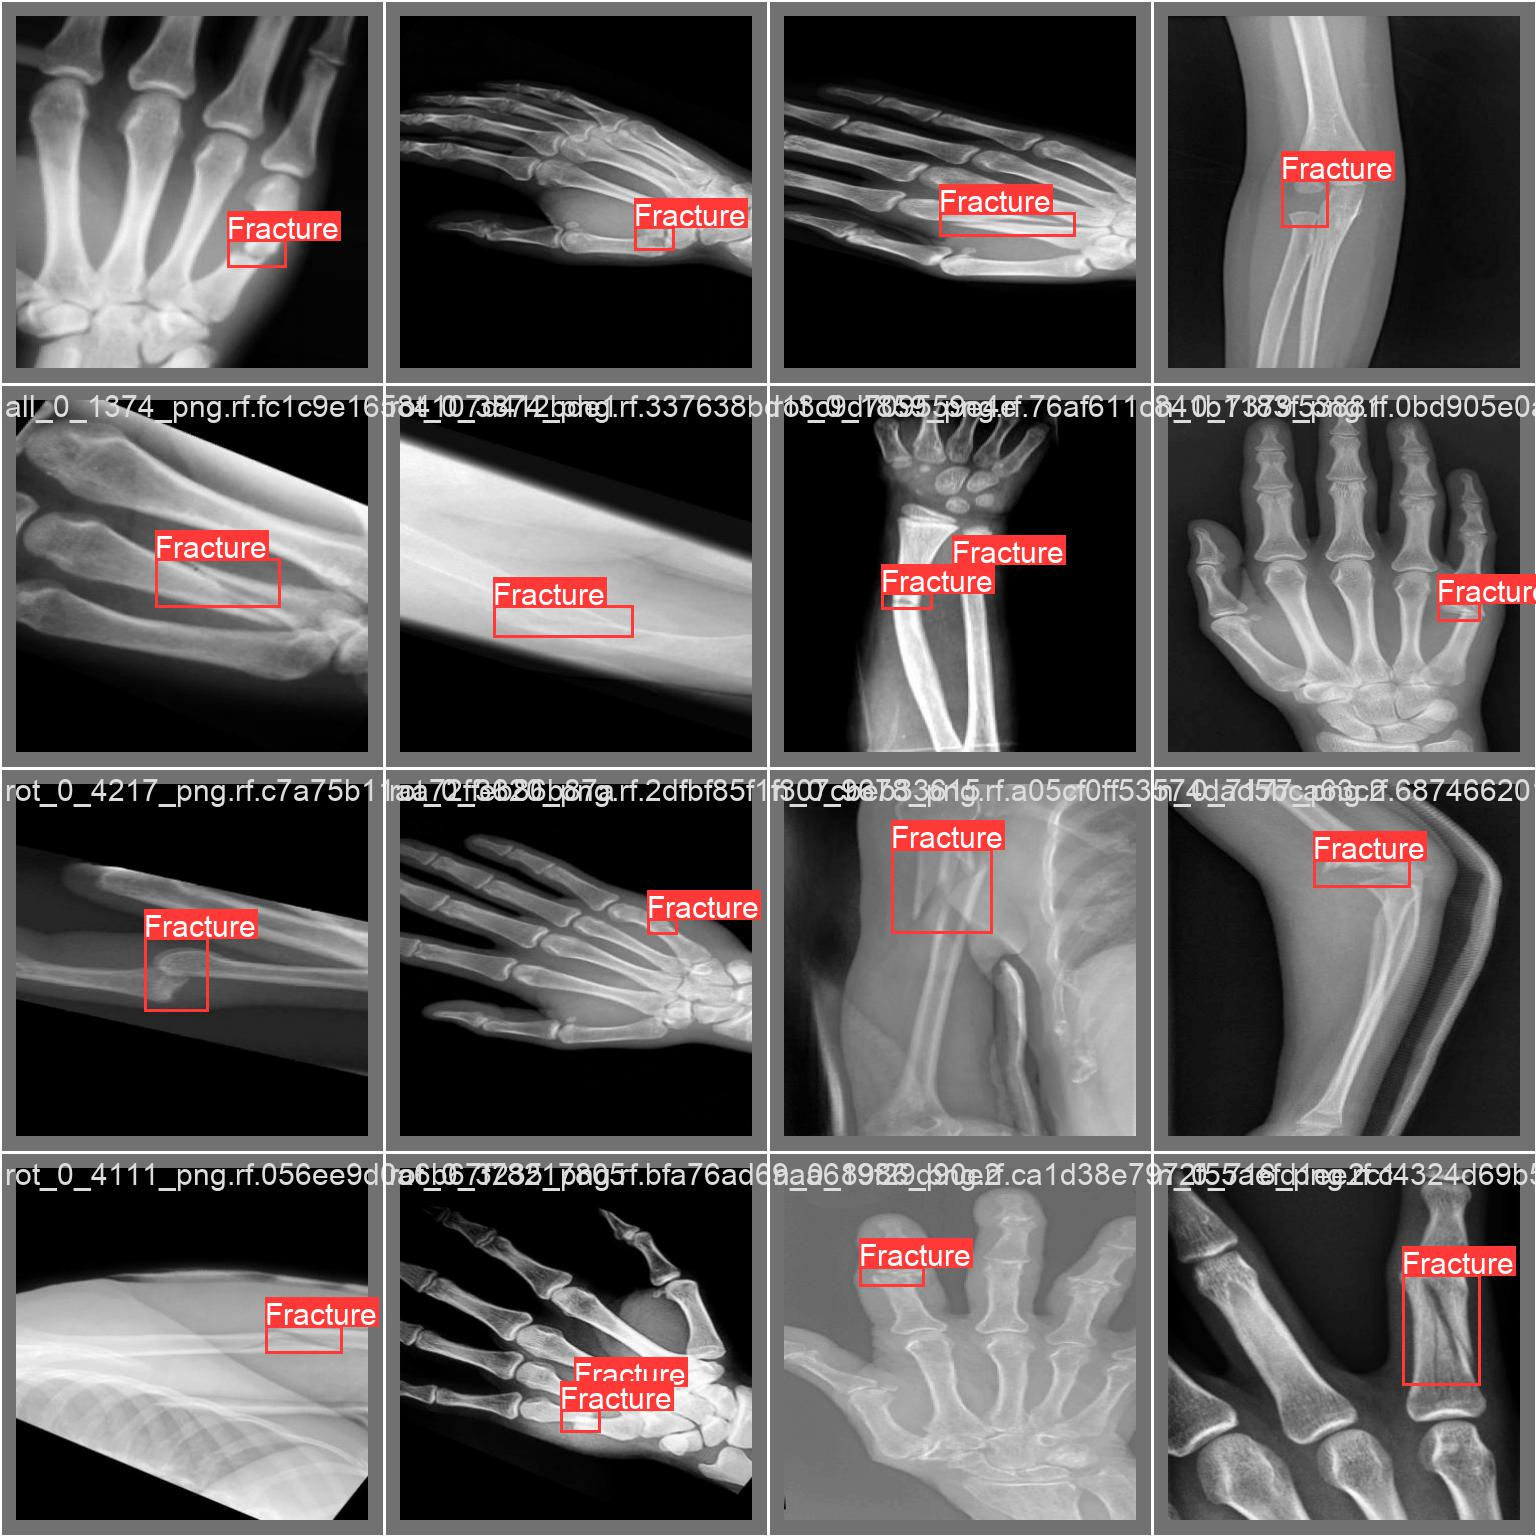

In [9]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg',width=600)

/kaggle/working


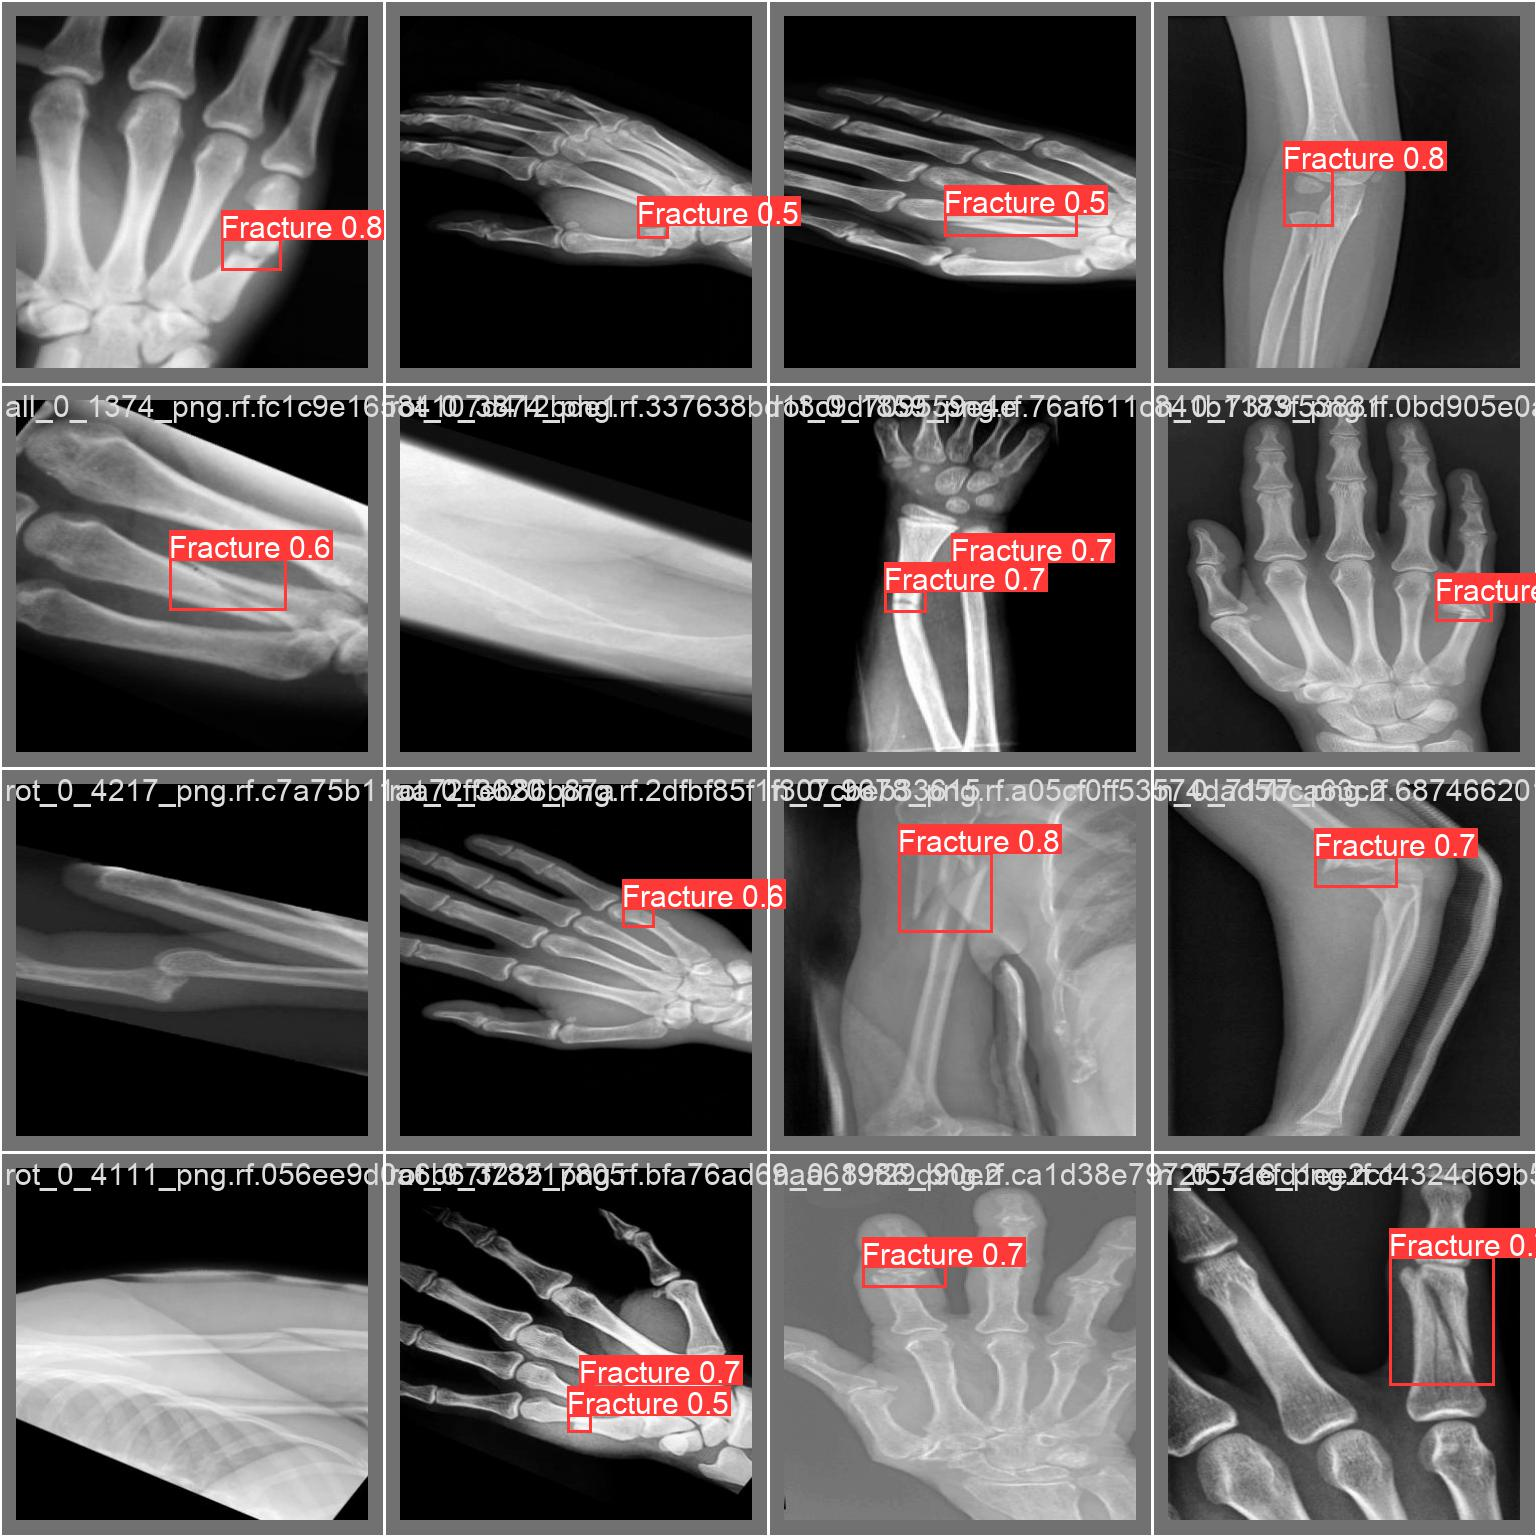

In [10]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg',width=600)

# Validation

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.49 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /kaggle/working/Bone-fracture-detection-1/valid/labels.cache... 99
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         99        117      0.883      0.675      0.767      0.364
Speed: 0.6ms preprocess, 12.7ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val


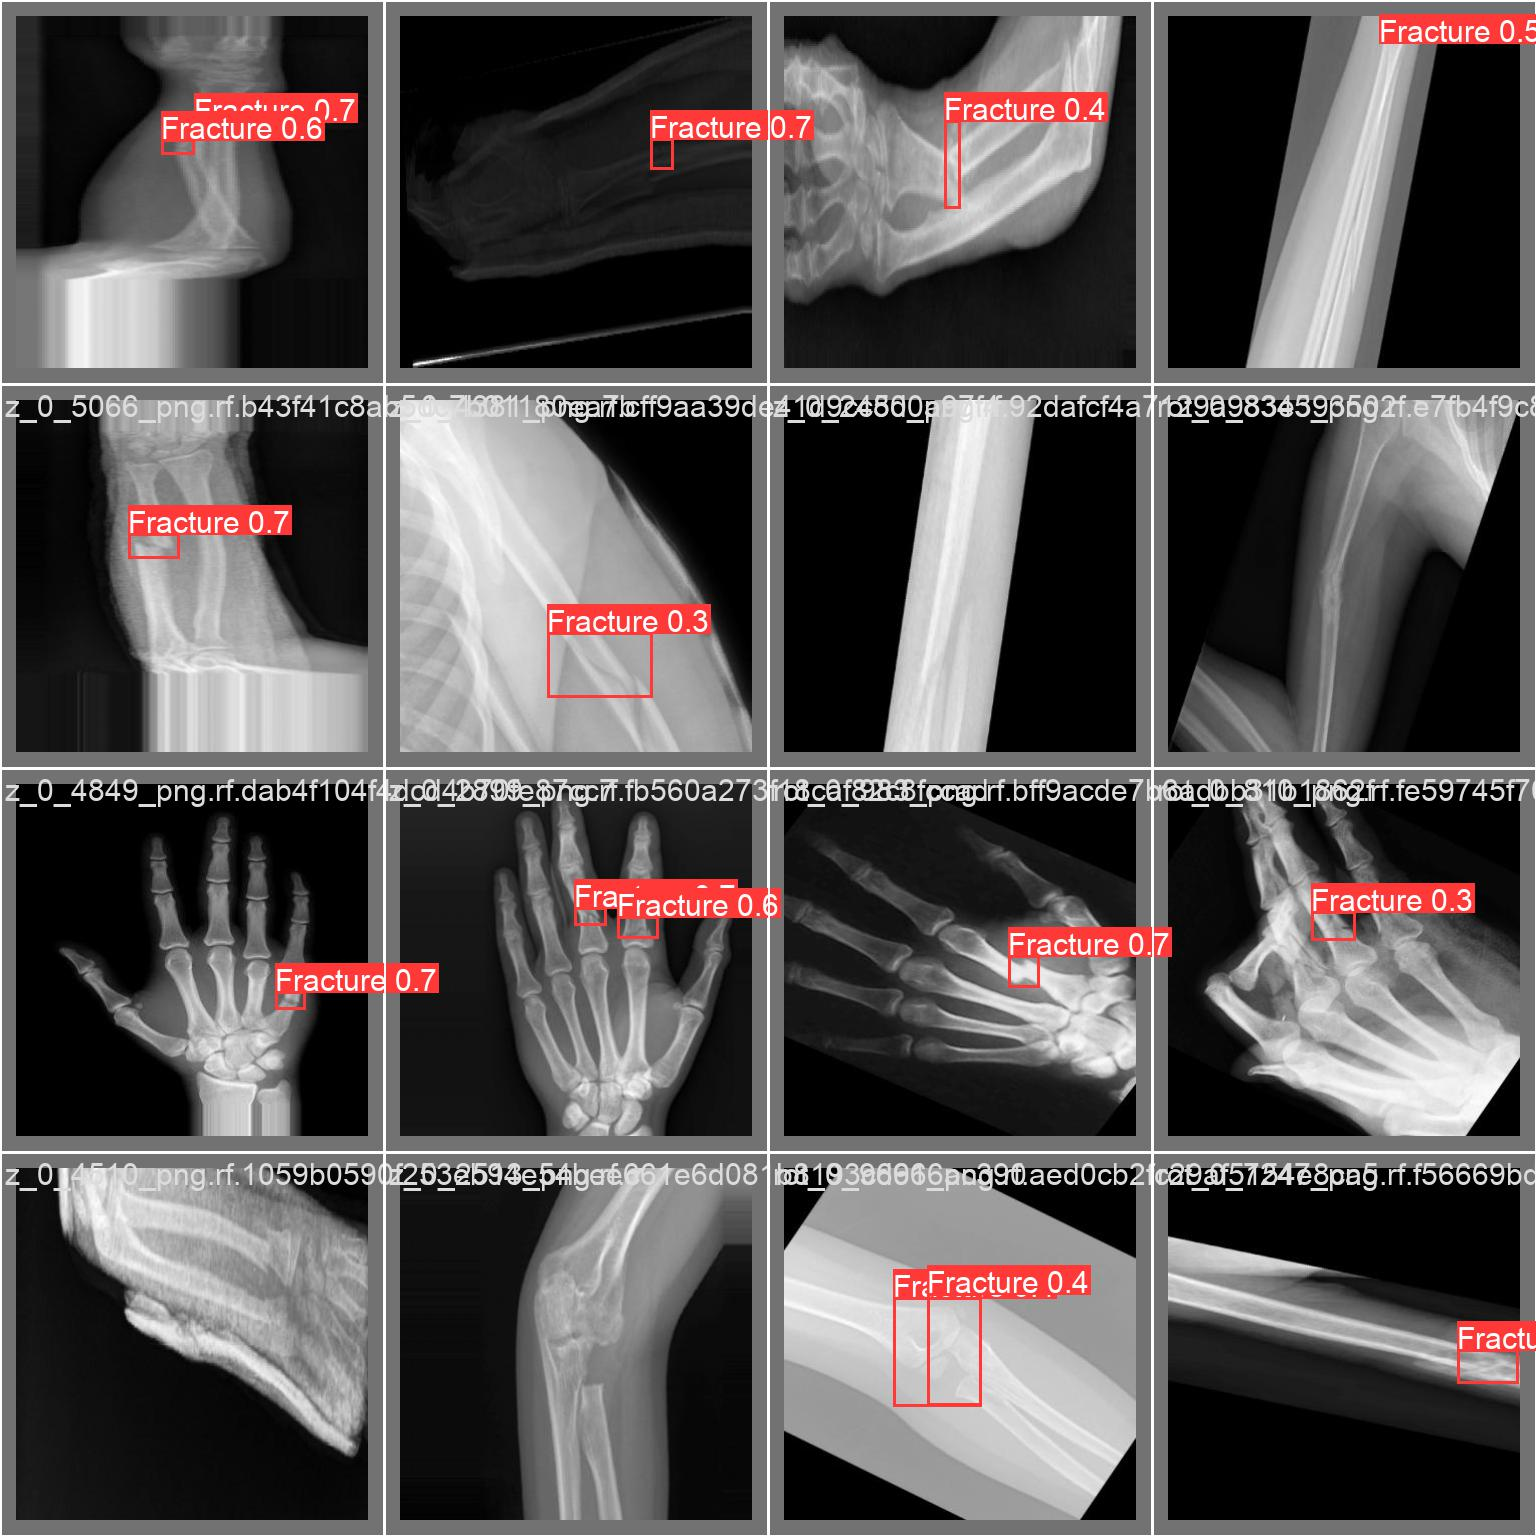

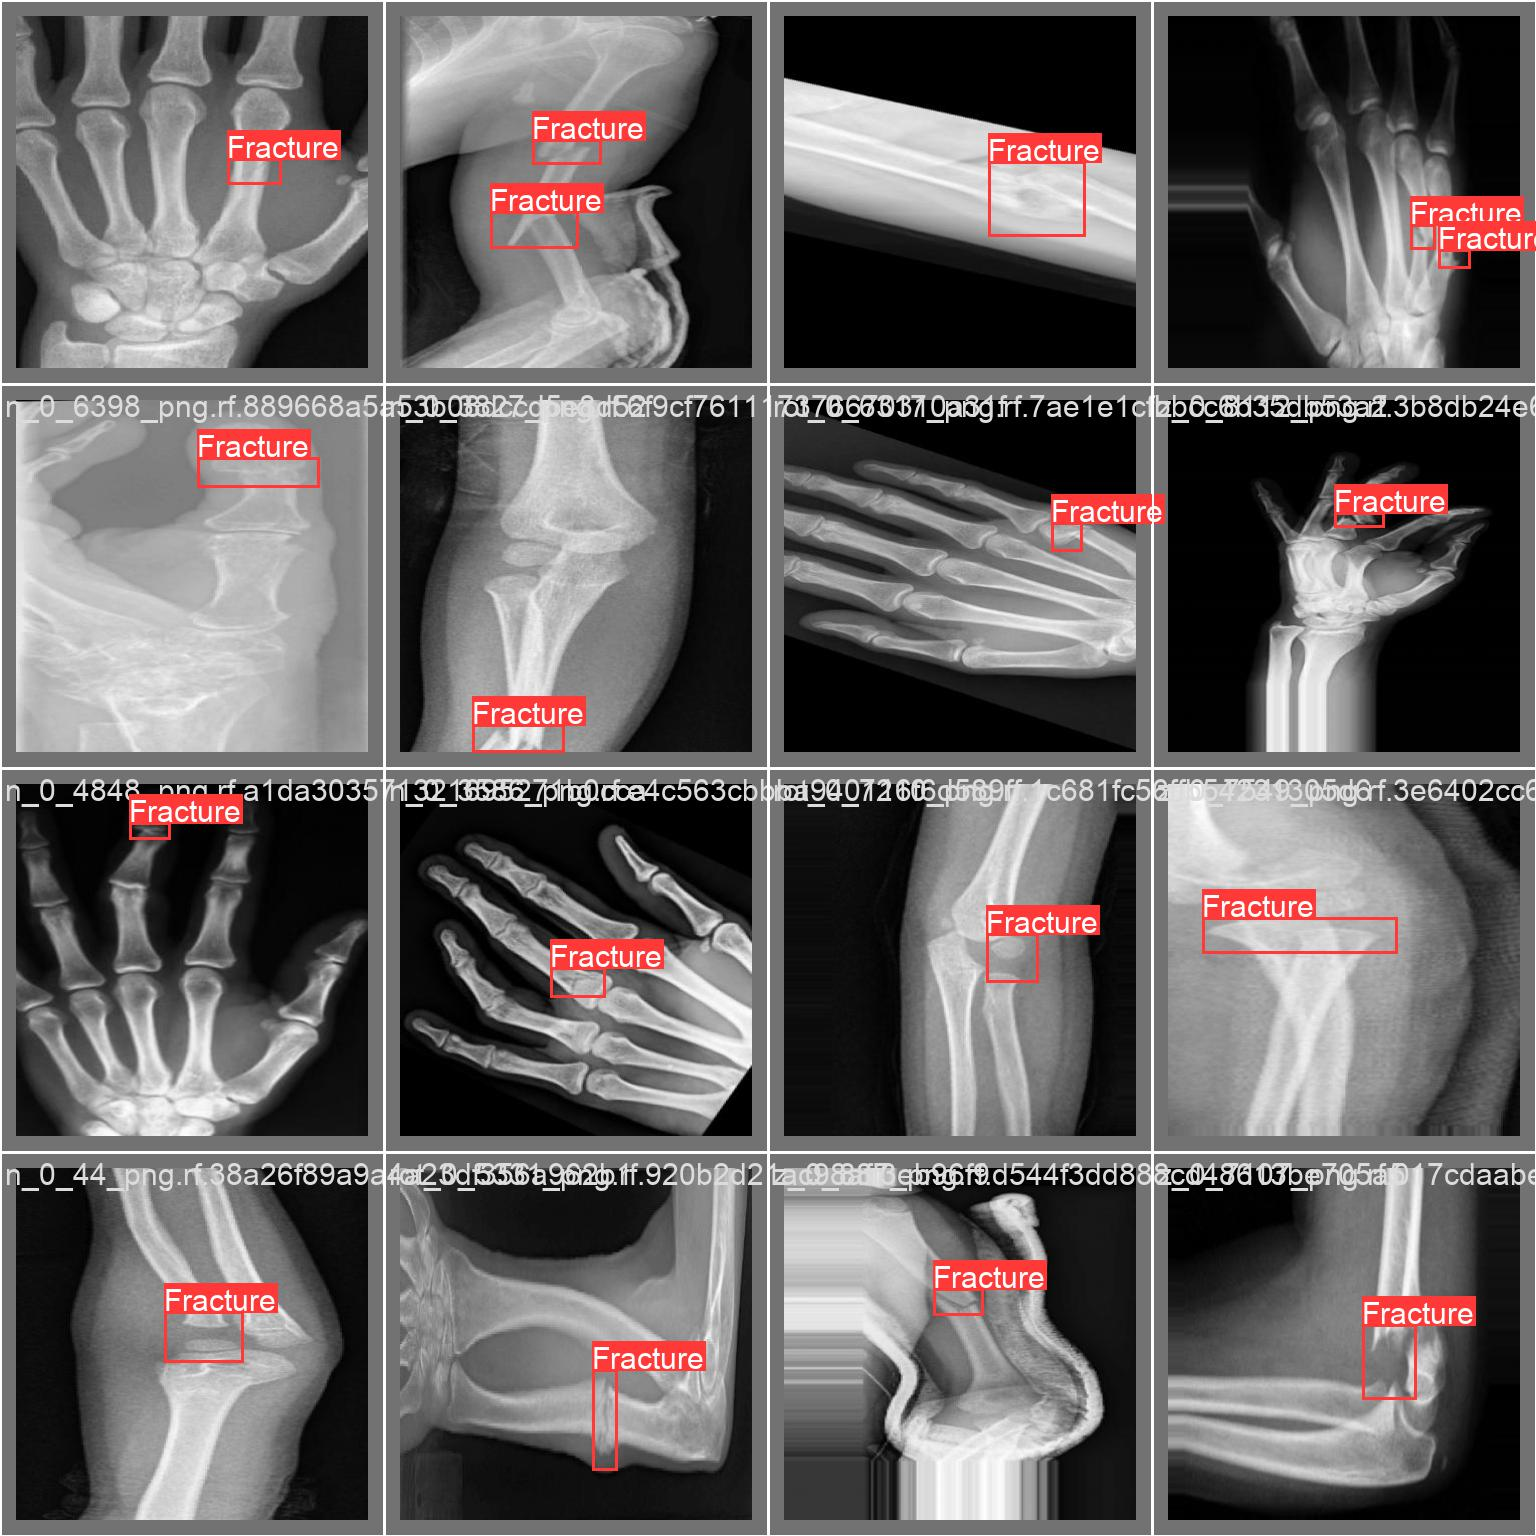

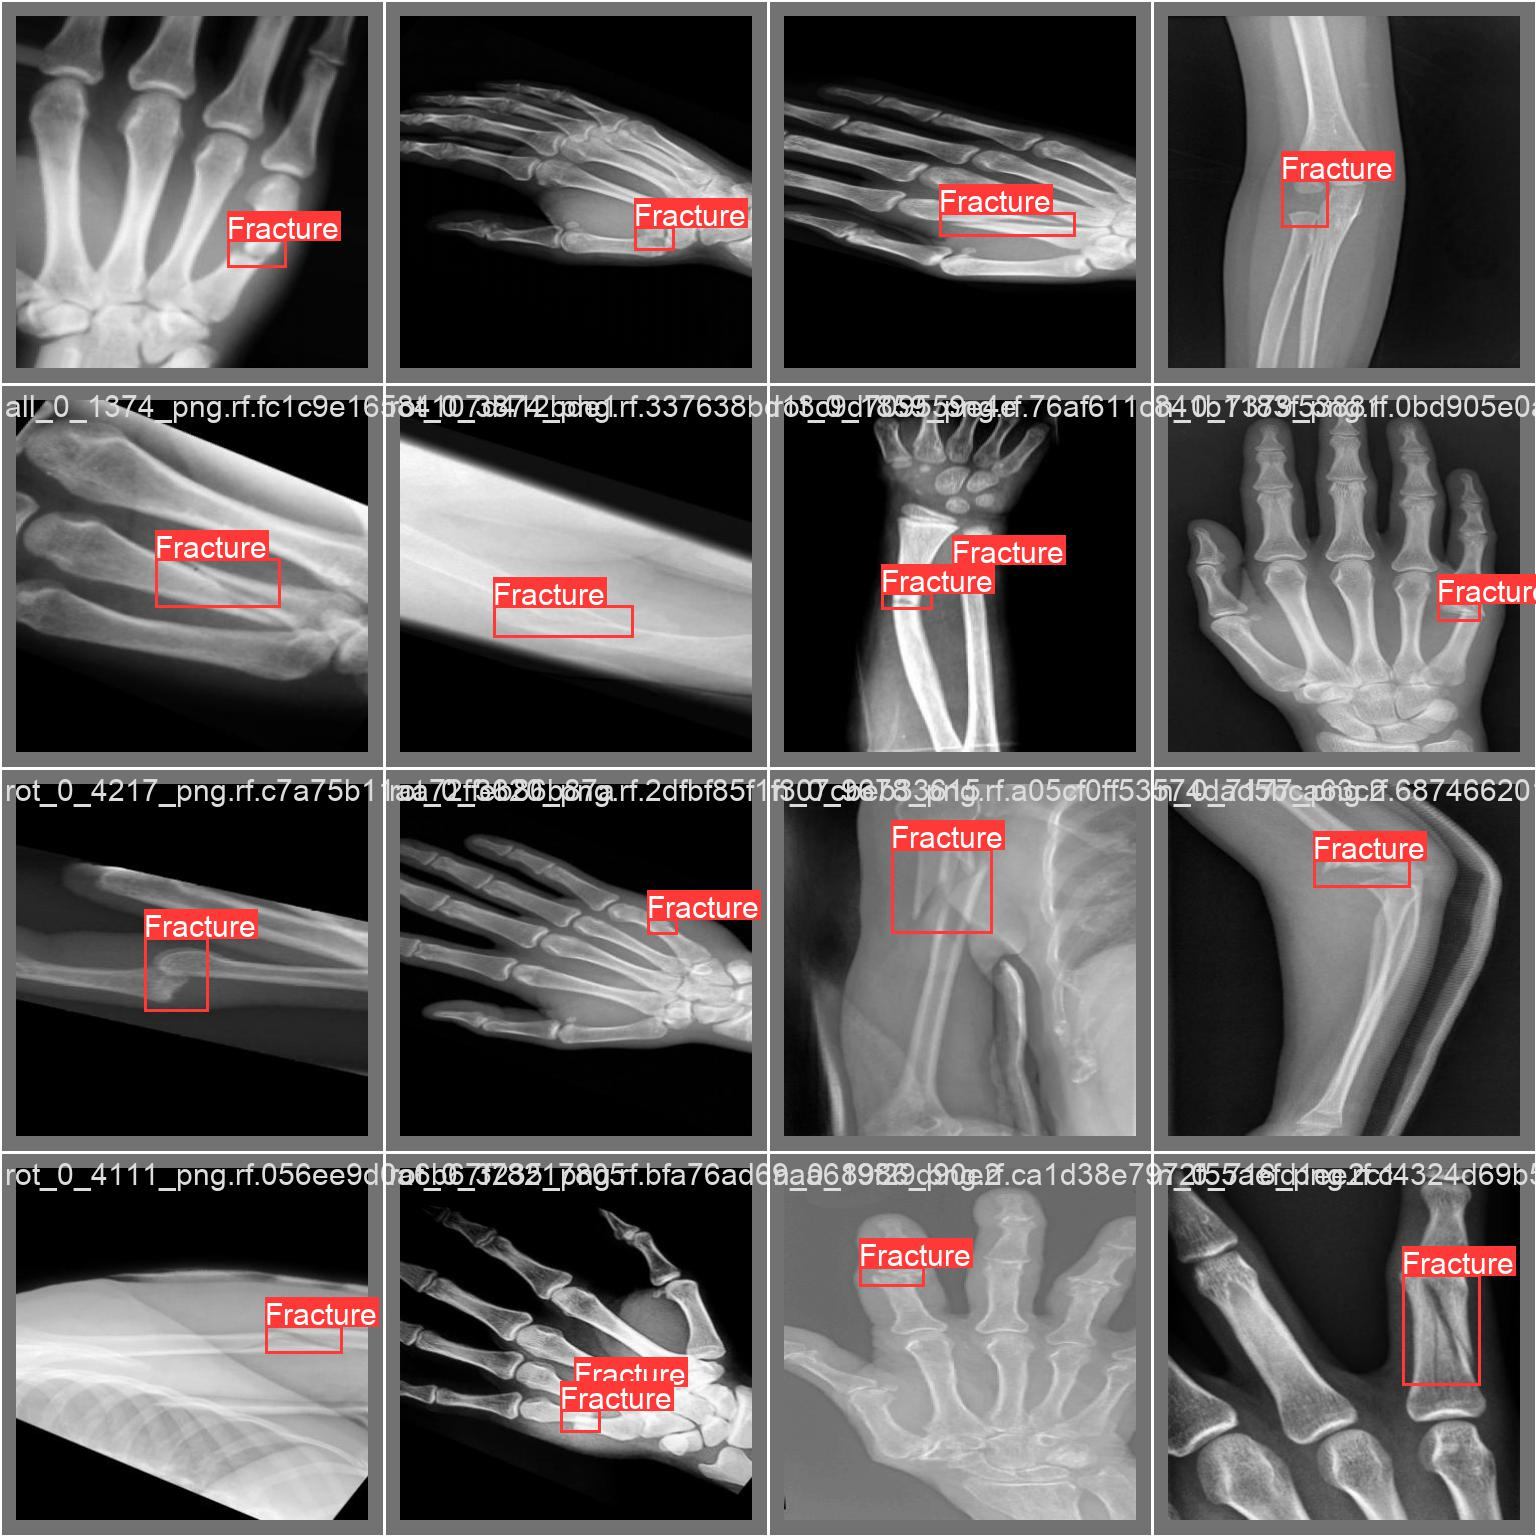

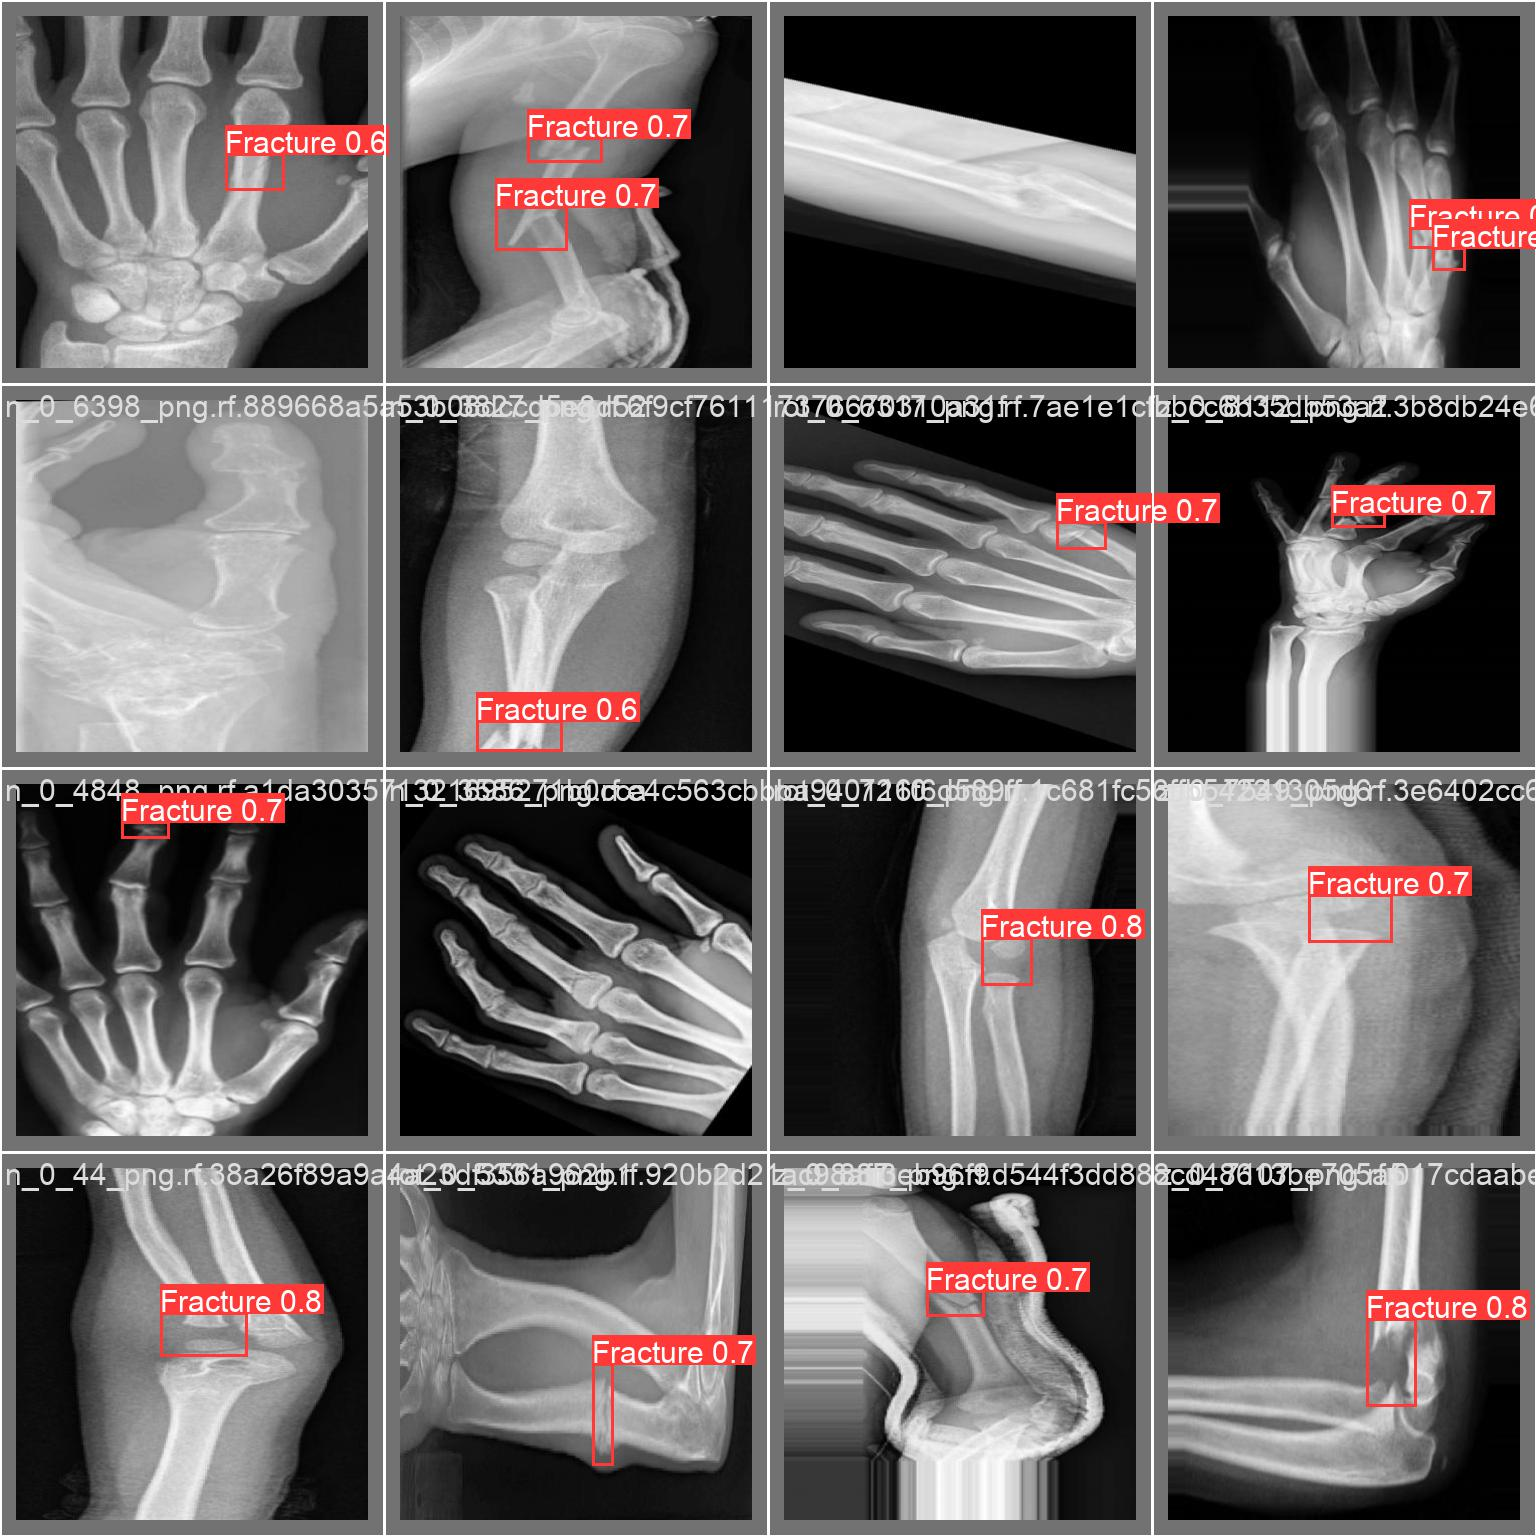

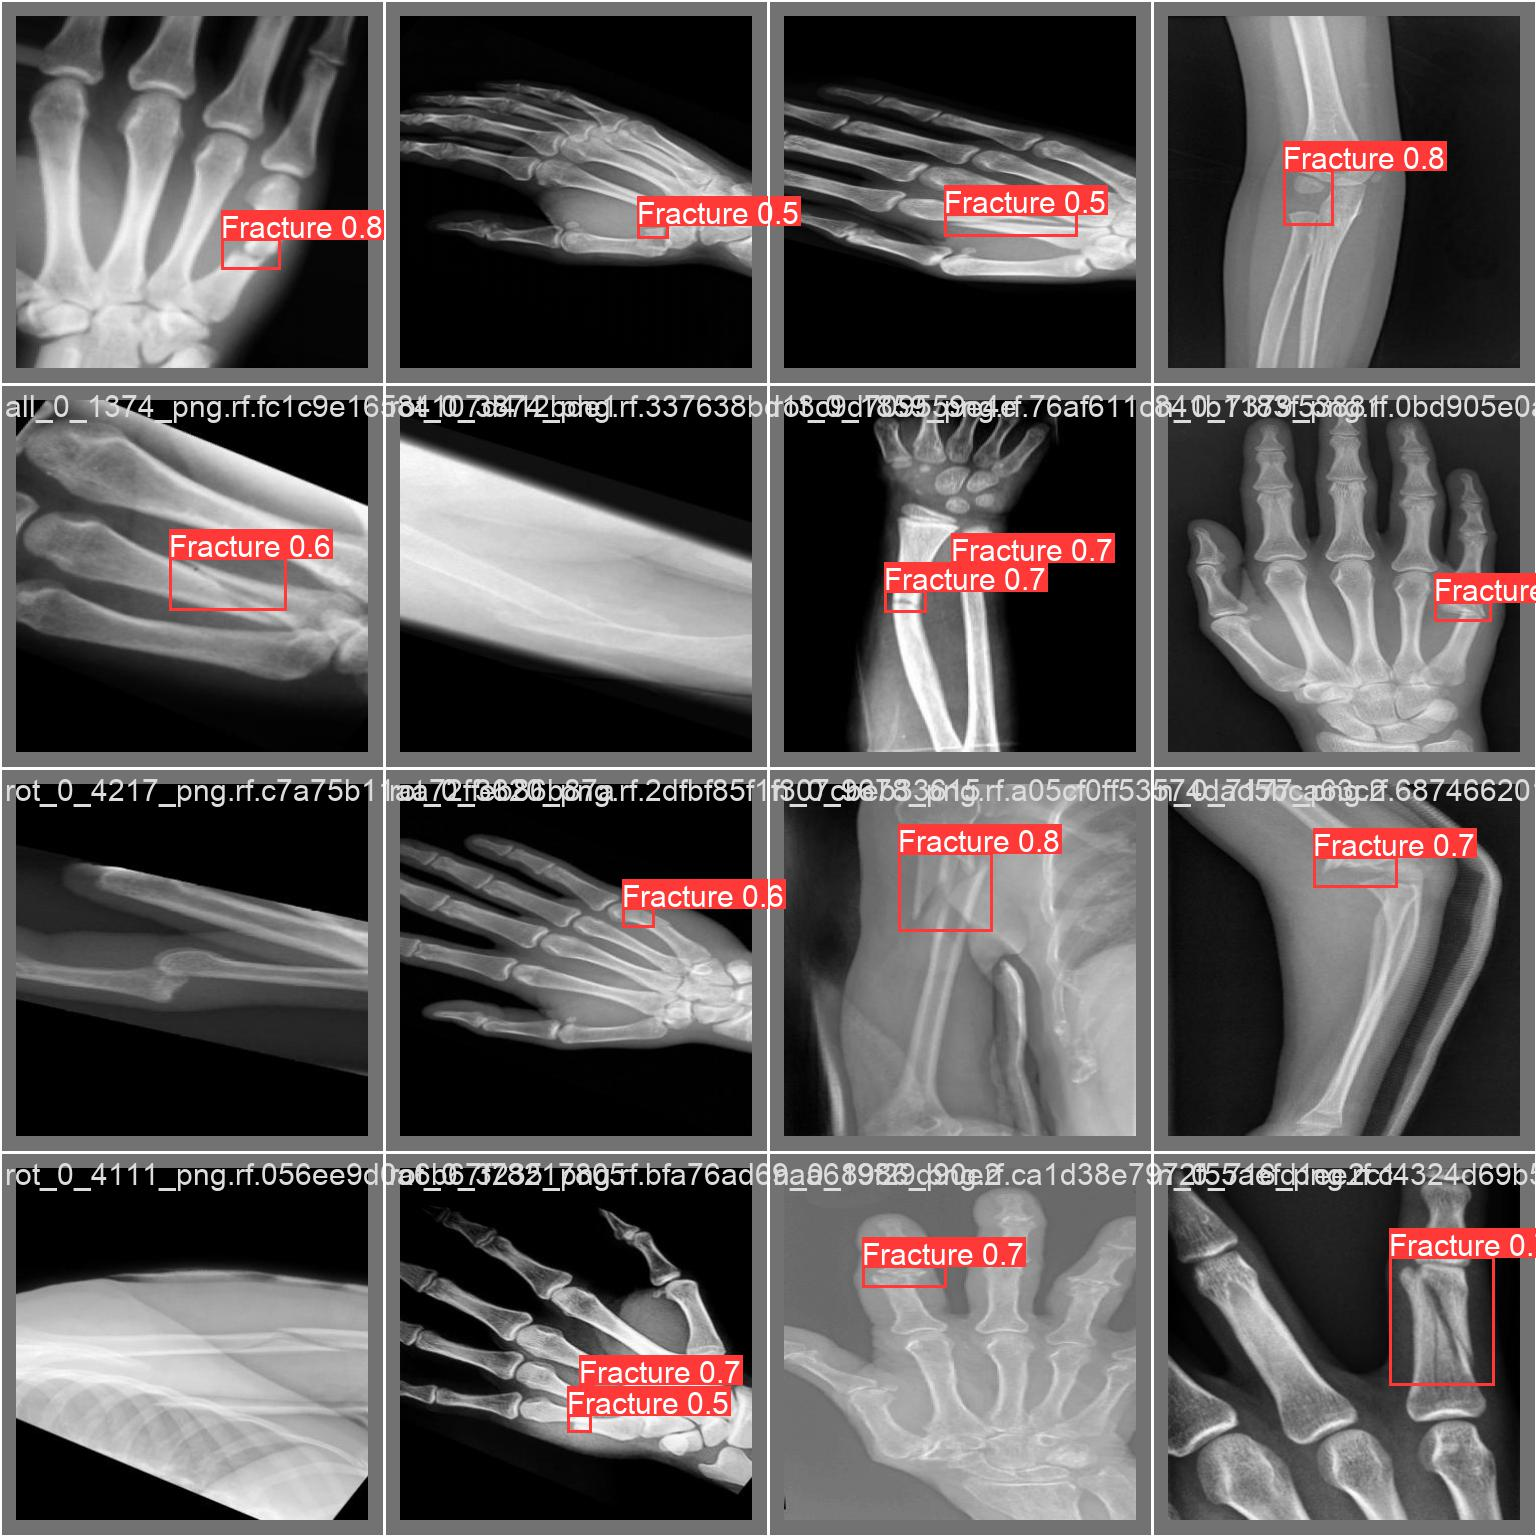

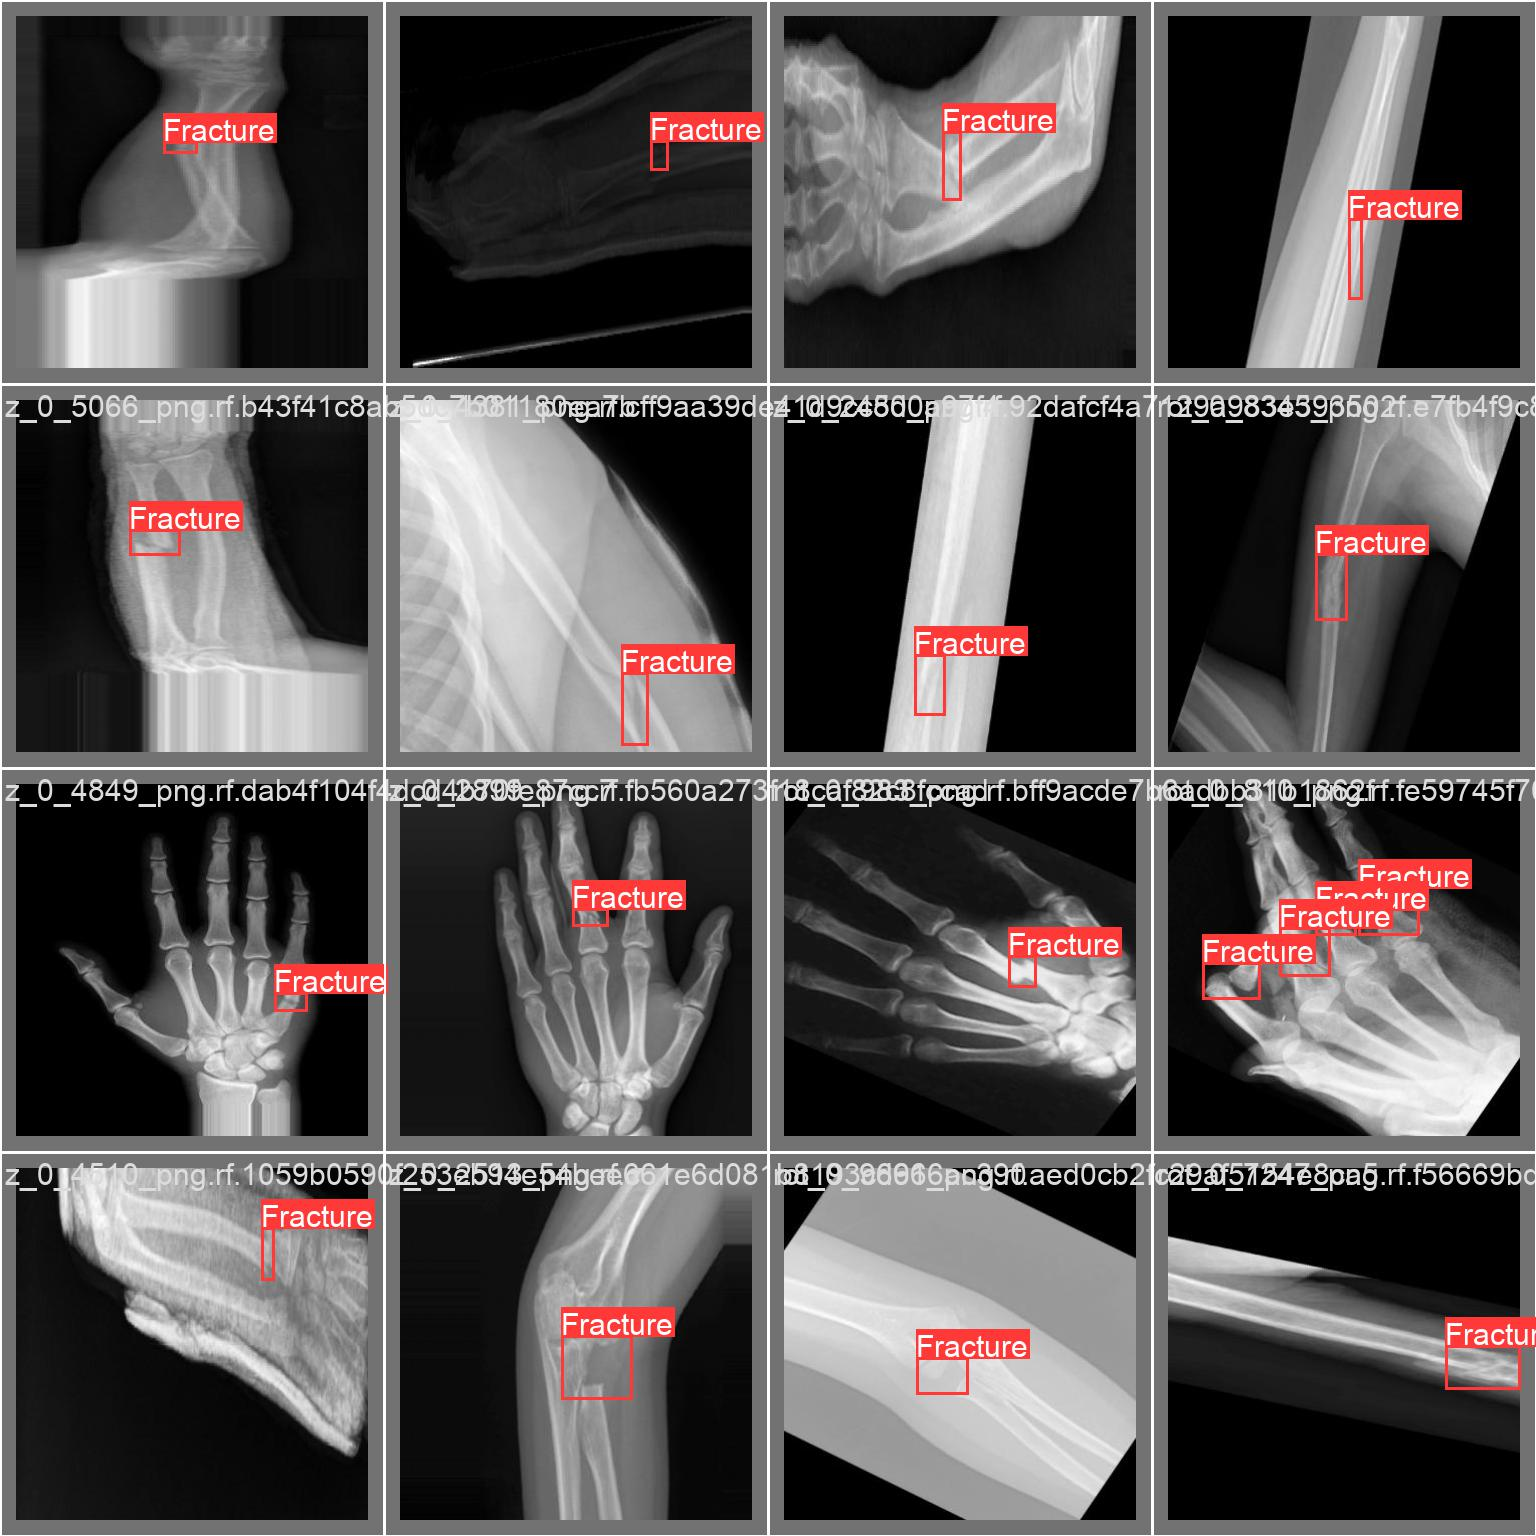

In [12]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'{HOME}/runs/detect/val/*.jpg')[:]:
  display(Image(filename=image_path,width=600))
  print('\n')

# Interference

In [13]:
%cd {HOME}

!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 save=True source={dataset.location}/test/images

/kaggle/working
Ultralytics YOLOv8.0.49 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/156 /kaggle/working/Bone-fracture-detection-1/test/images/all_0_1142_png.rf.4ba726be944734d8df455b77cc49a54f.jpg: 352x352 1 Fracture, 32.2ms
image 2/156 /kaggle/working/Bone-fracture-detection-1/test/images/all_0_1285_png.rf.199b6d0816f2fddd475e6c3e6047ebdf.jpg: 352x352 1 Fracture, 32.2ms
image 3/156 /kaggle/working/Bone-fracture-detection-1/test/images/all_0_157_png.rf.fa0c268e78529c31b78522a3a718e992.jpg: 352x352 (no detections), 32.3ms
image 4/156 /kaggle/working/Bone-fracture-detection-1/test/images/all_0_1640_png.rf.b2d829f022772b47dd885f984ea1de26.jpg: 352x352 2 Fractures, 32.2ms
image 5/156 /kaggle/working/Bone-fracture-detection-1/test/images/all_0_2324_png.rf.64c3541a9e2a4eafb1730138f27ac1e5.jpg: 352x352 1 Fracture, 32.2ms
image 6/156 /kaggle/working/Bone-fracture-detection-1/test/images/all_

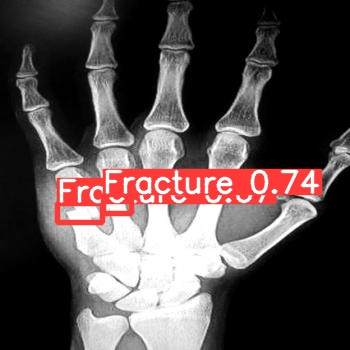

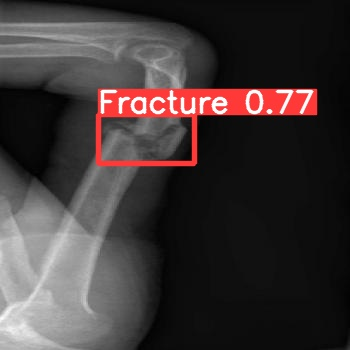

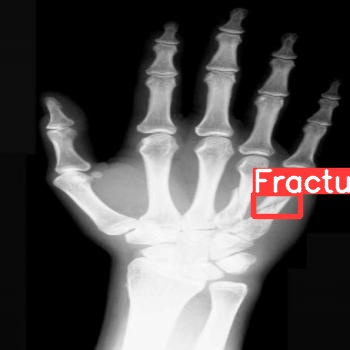

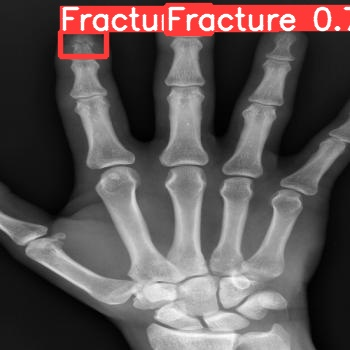

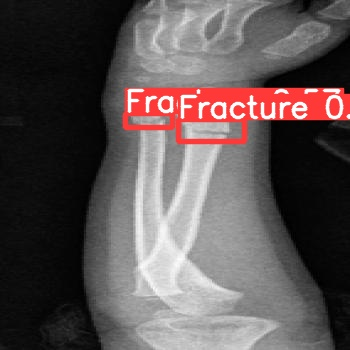

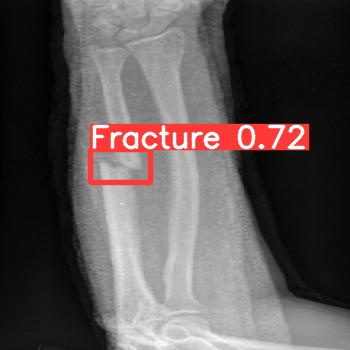

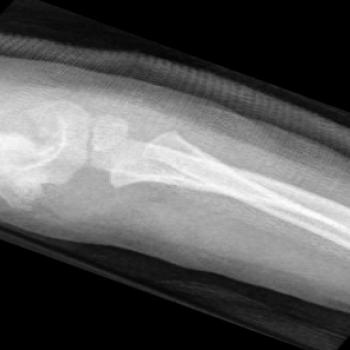

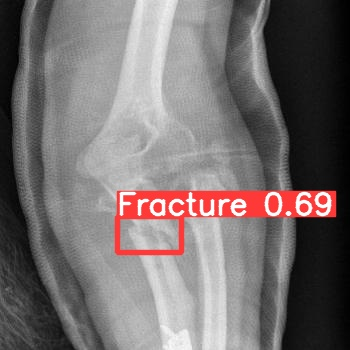

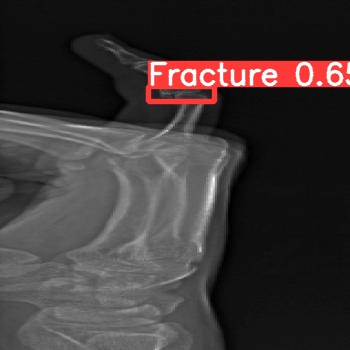

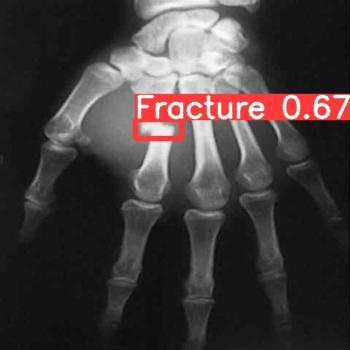

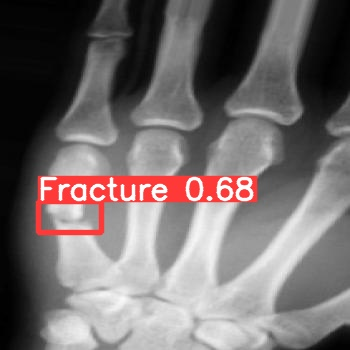

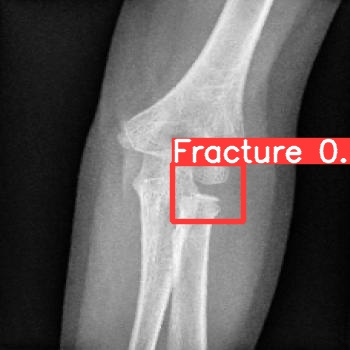

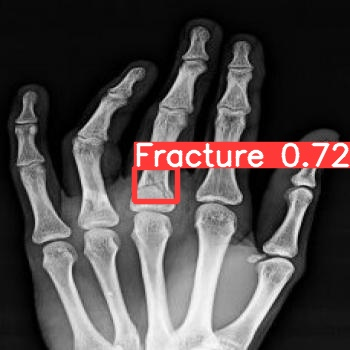

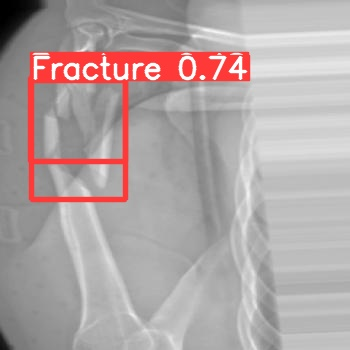

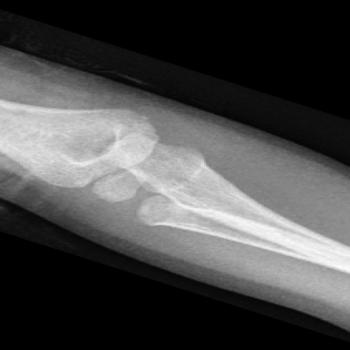

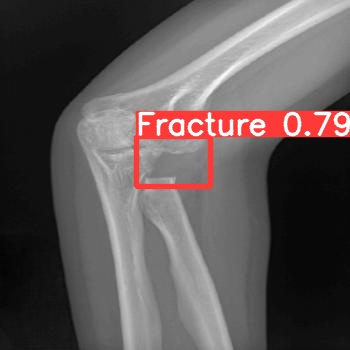

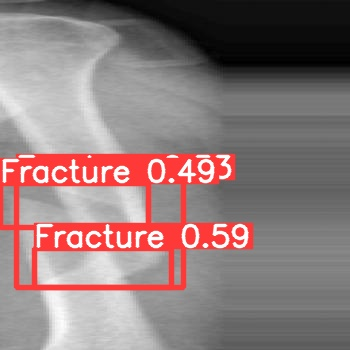

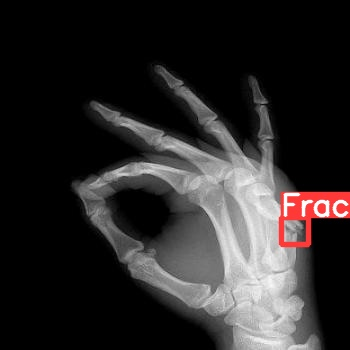

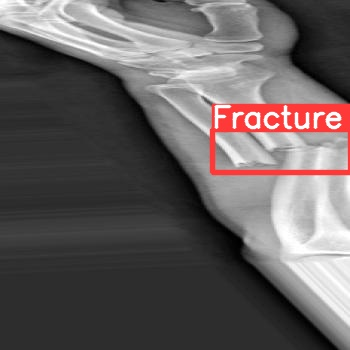

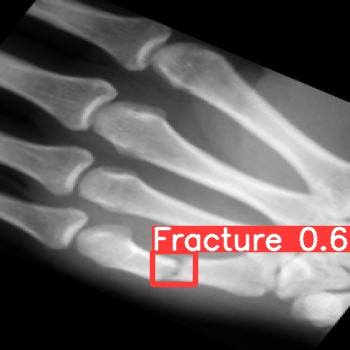

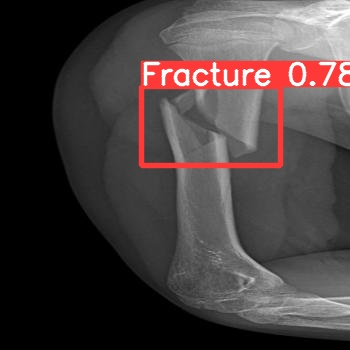

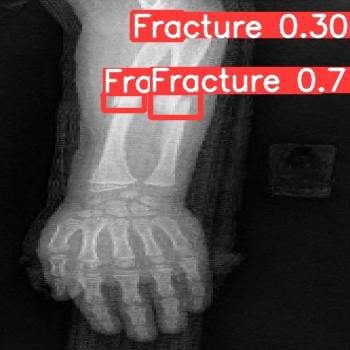

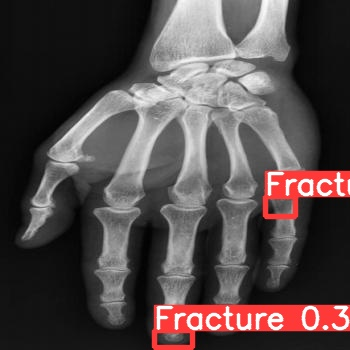

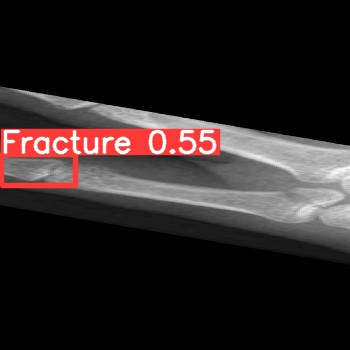

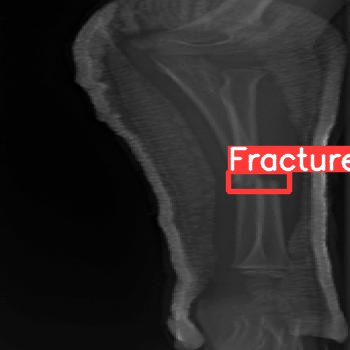

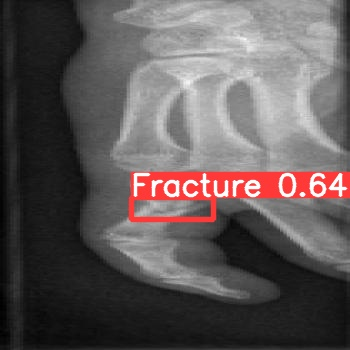

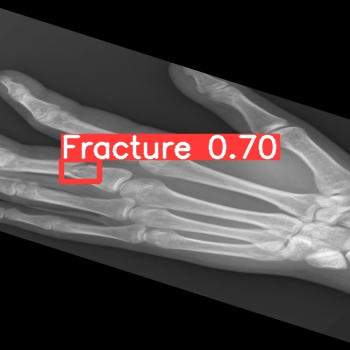

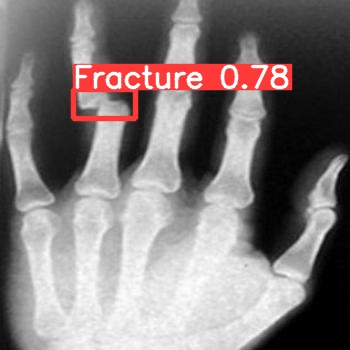

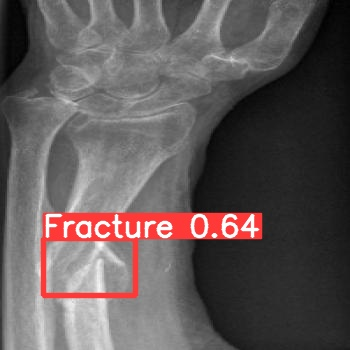

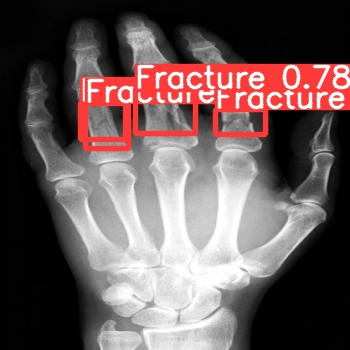

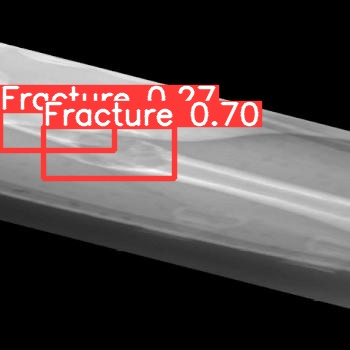

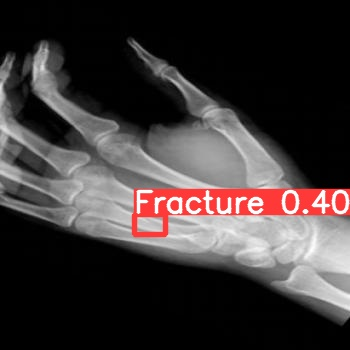

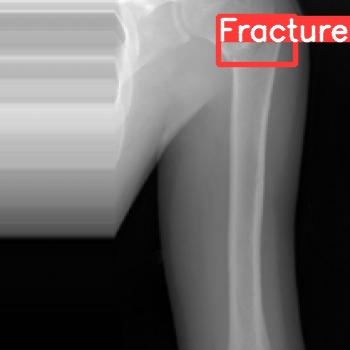

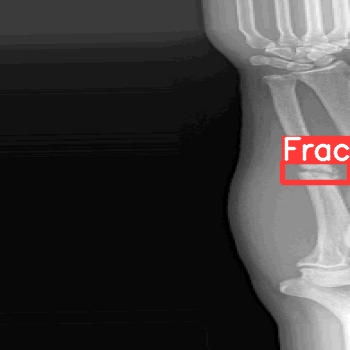

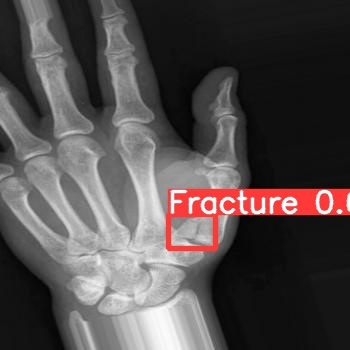

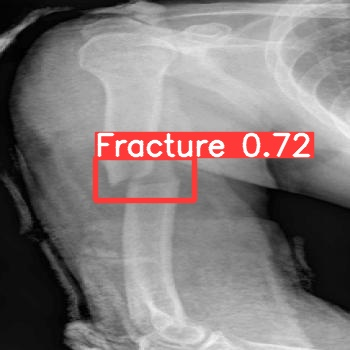

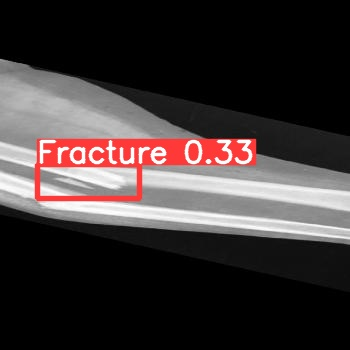

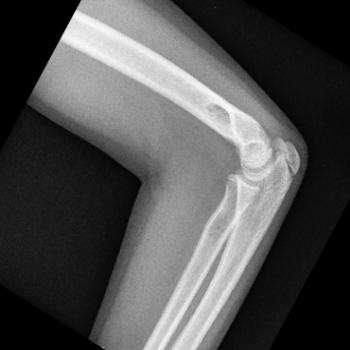

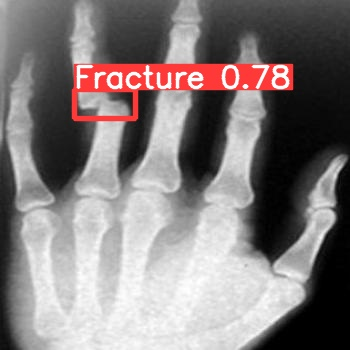

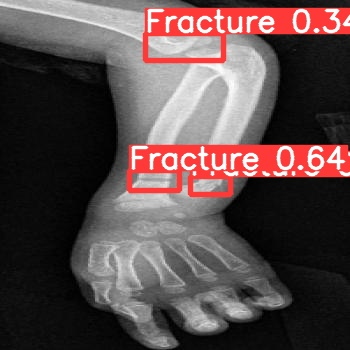

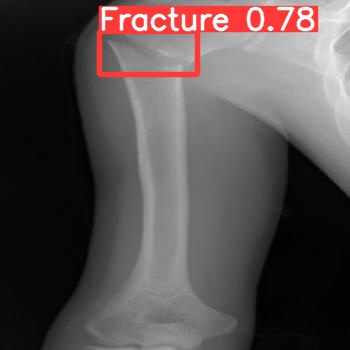

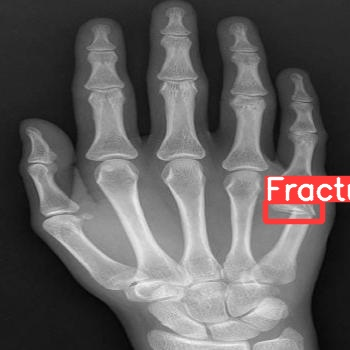

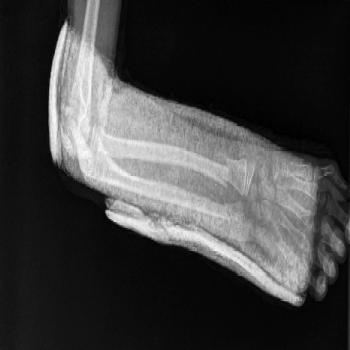

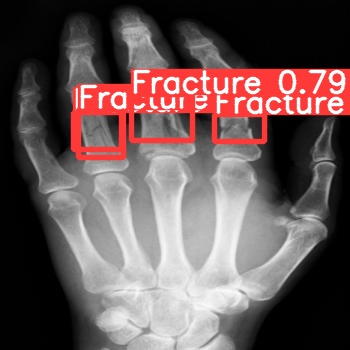

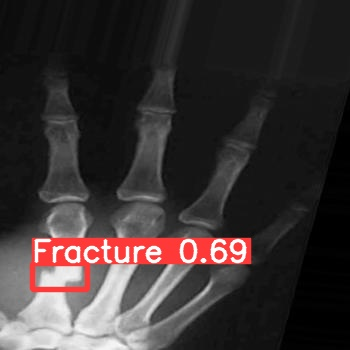

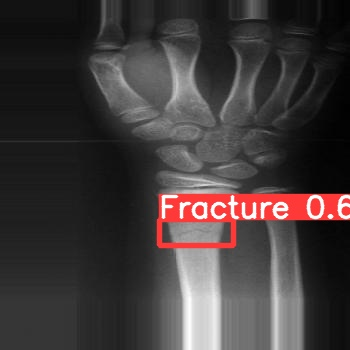

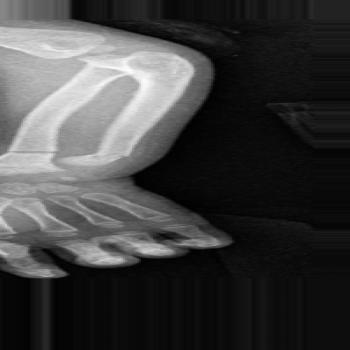

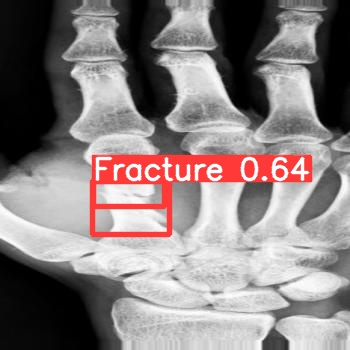

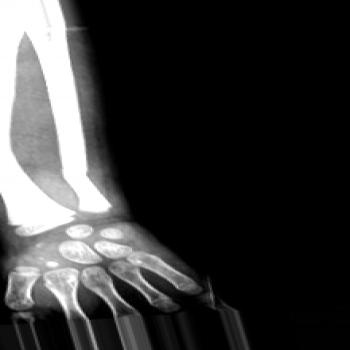

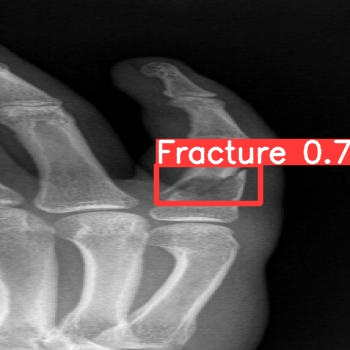

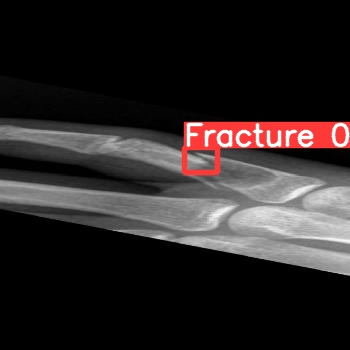

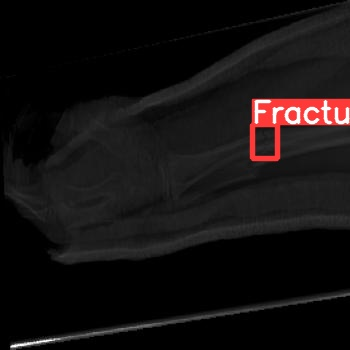

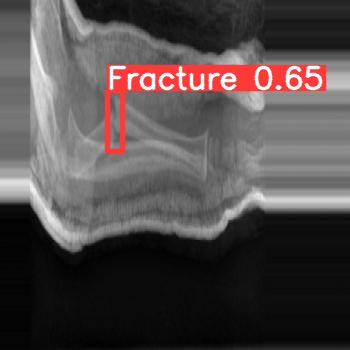

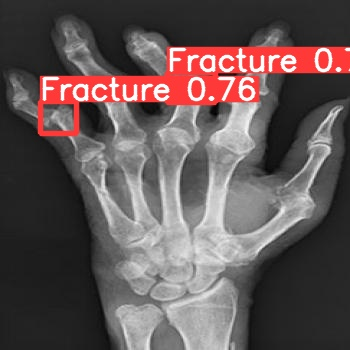

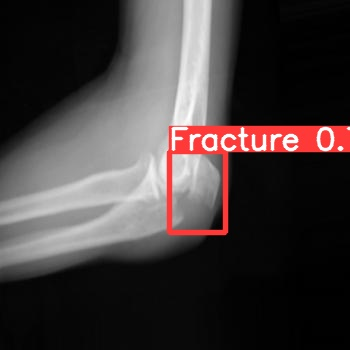

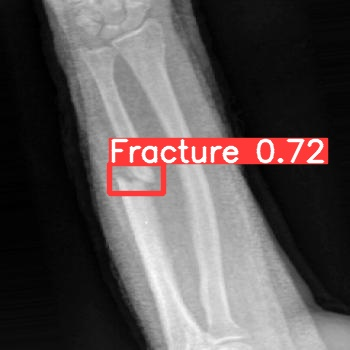

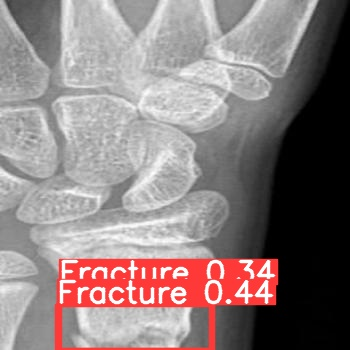

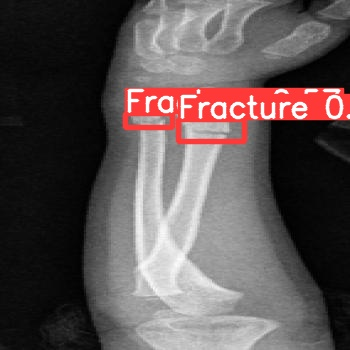

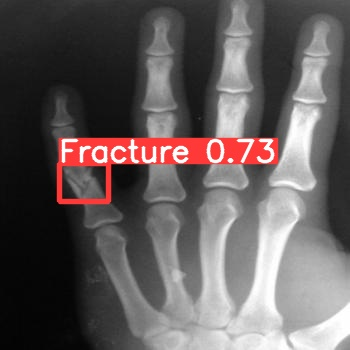

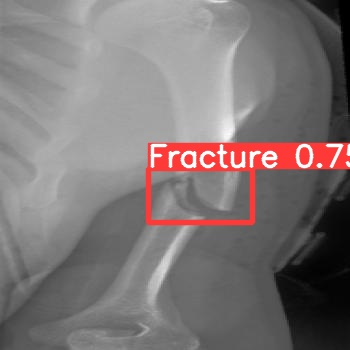

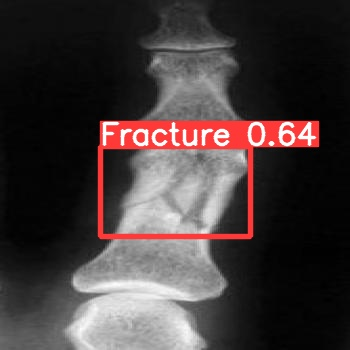

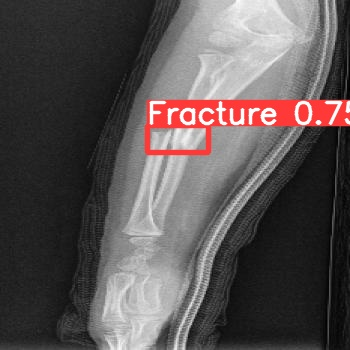

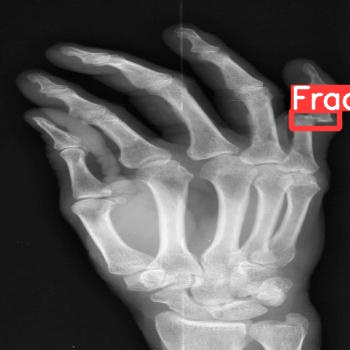

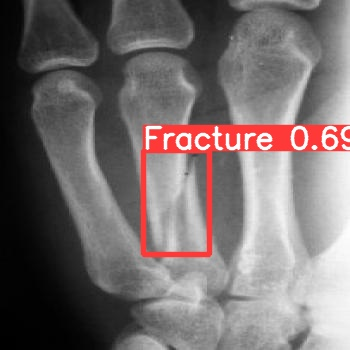

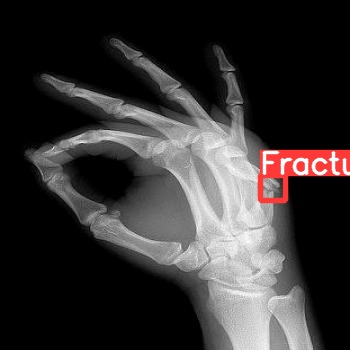

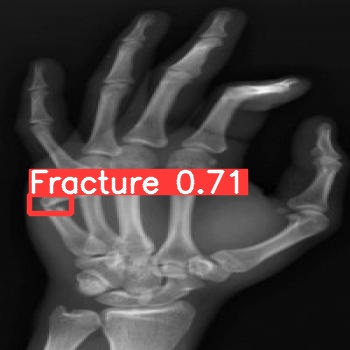

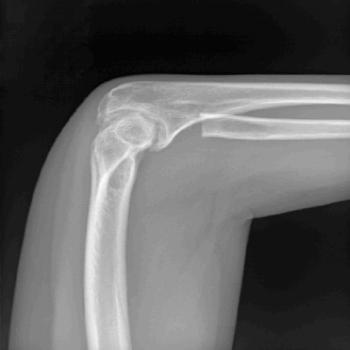

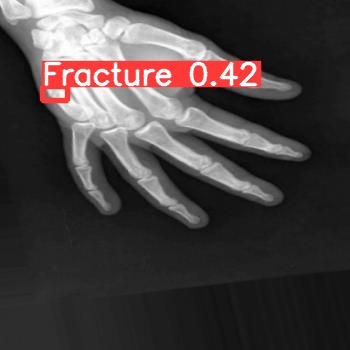

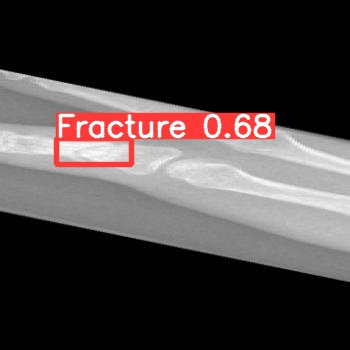

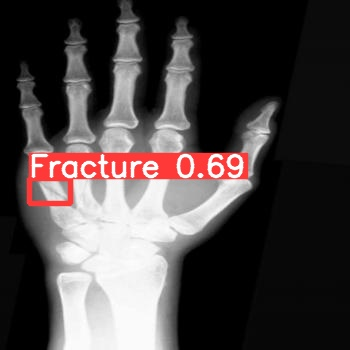

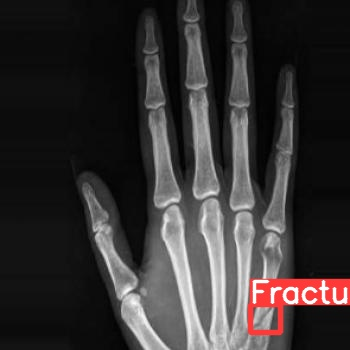

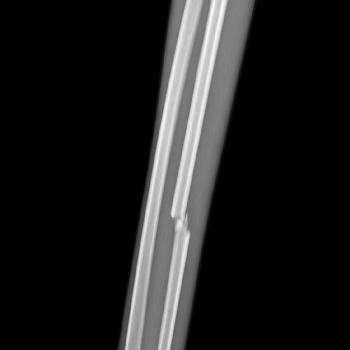

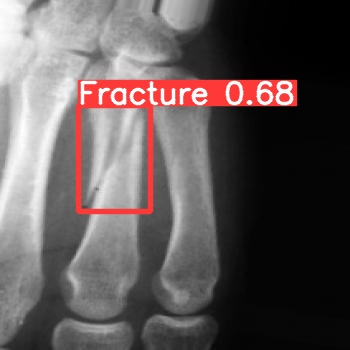

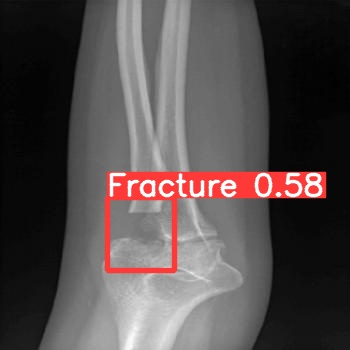

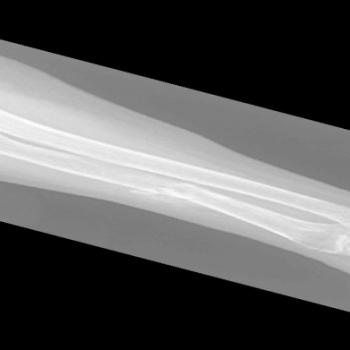

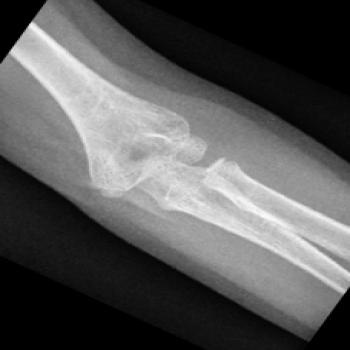

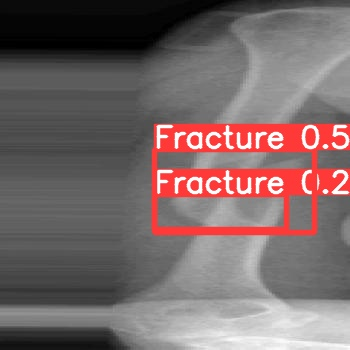

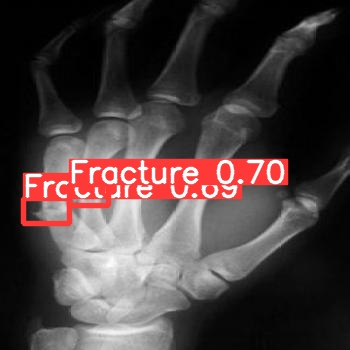

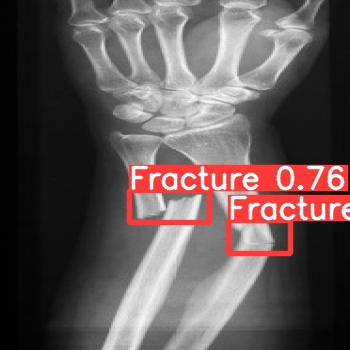

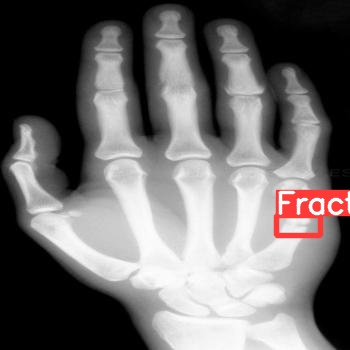

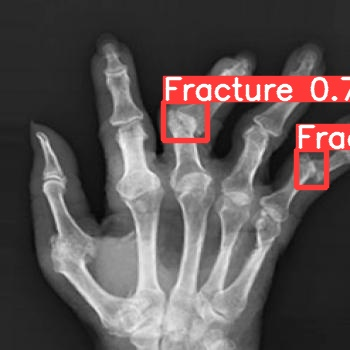

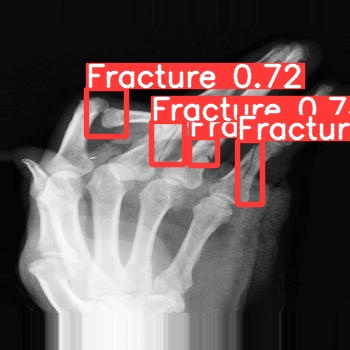

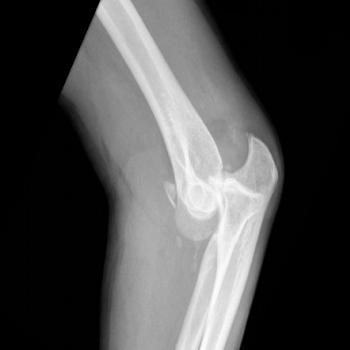

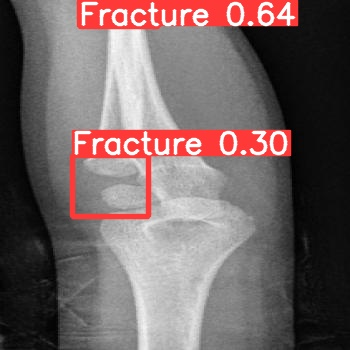

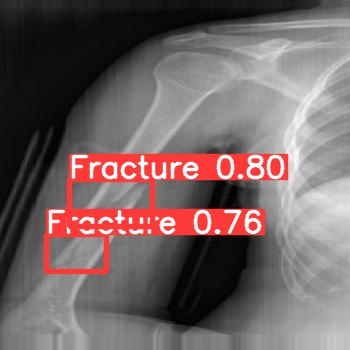

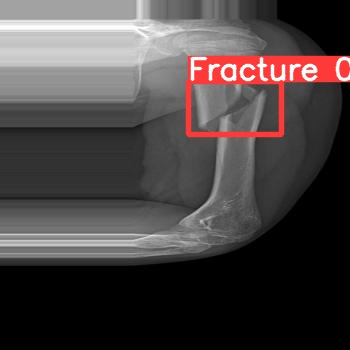

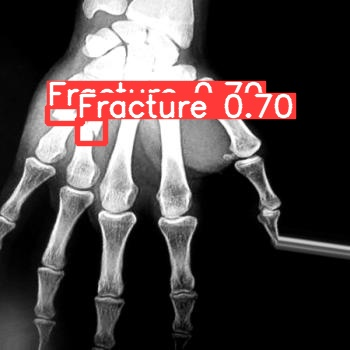

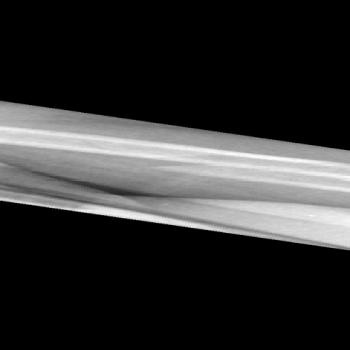

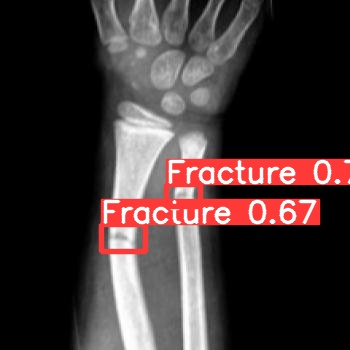

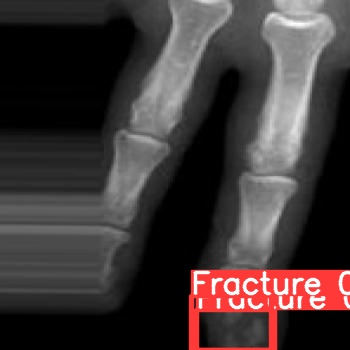

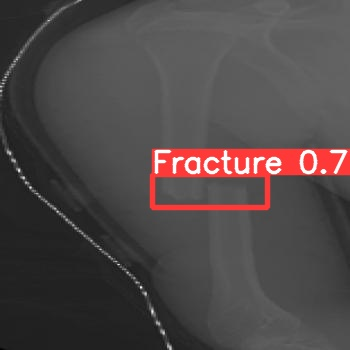

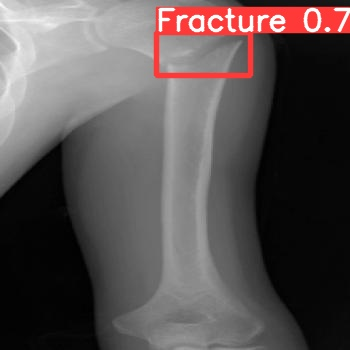

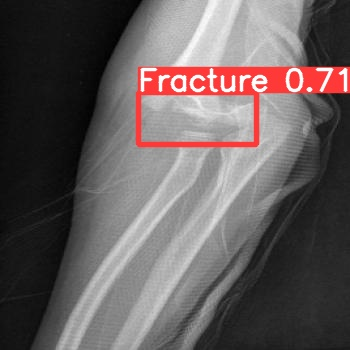

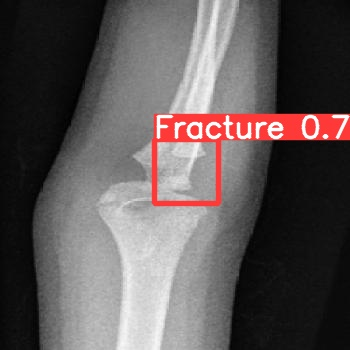

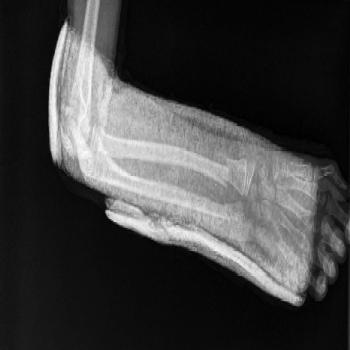

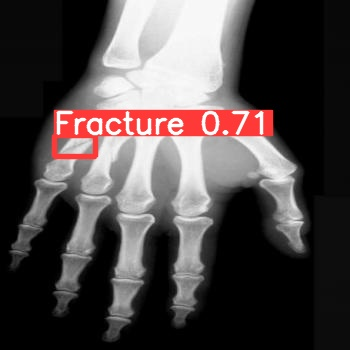

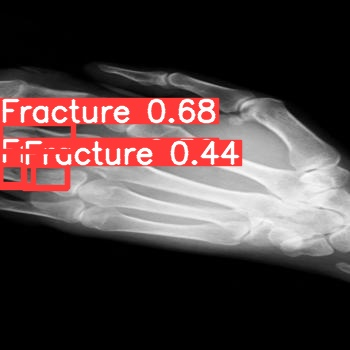

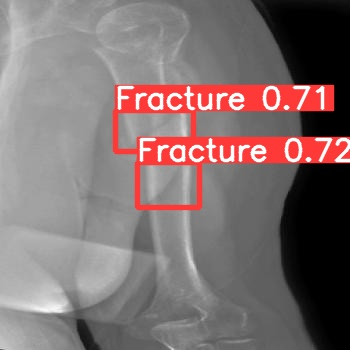

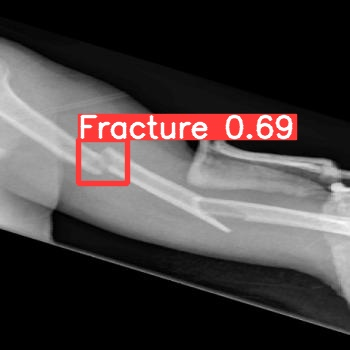

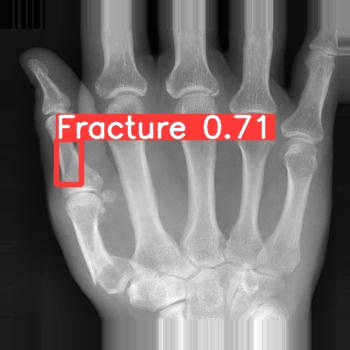

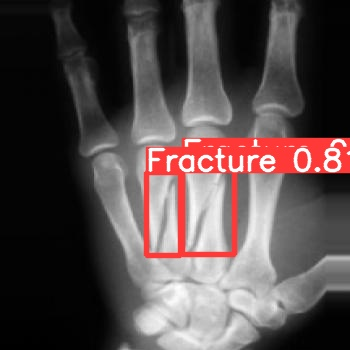

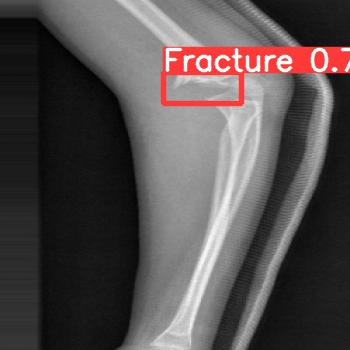

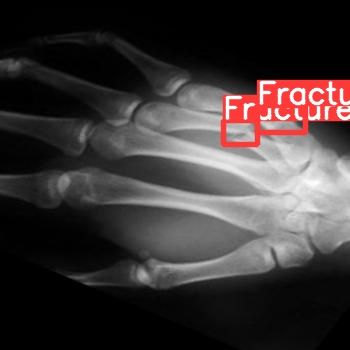

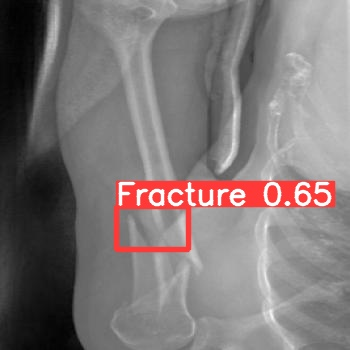

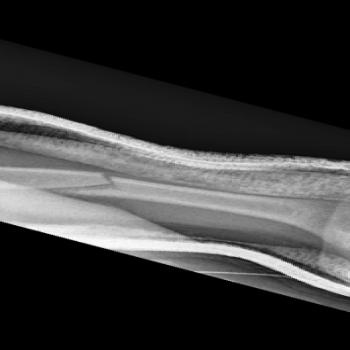

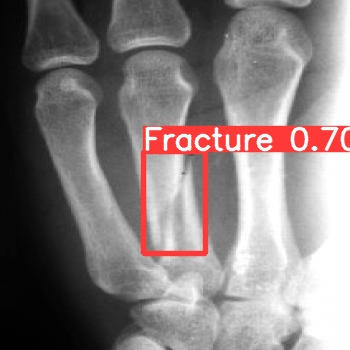

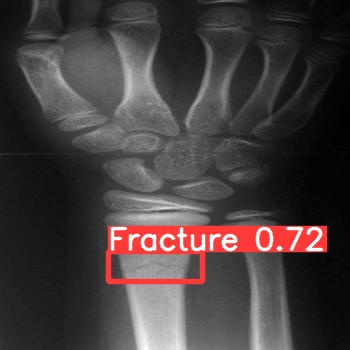

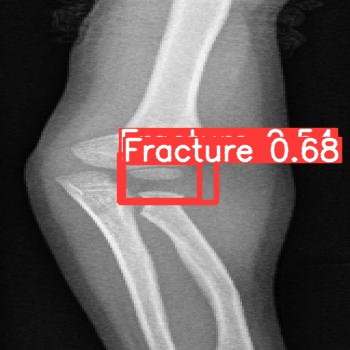

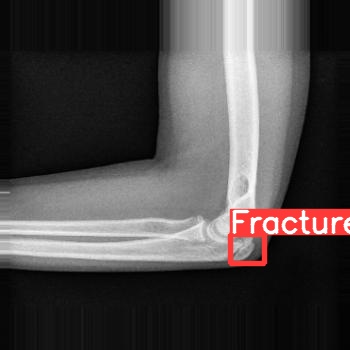

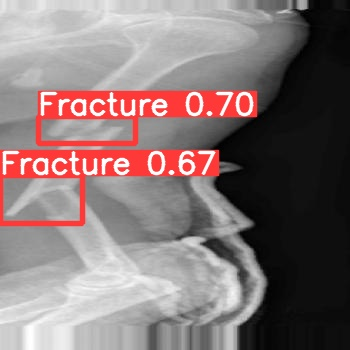

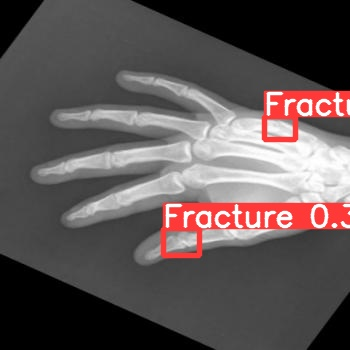

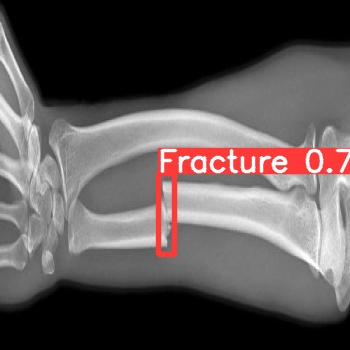

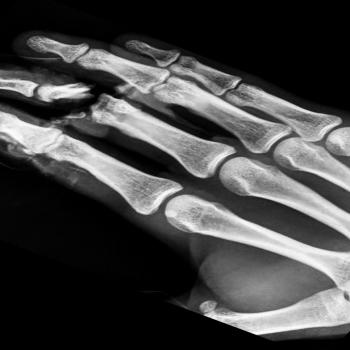

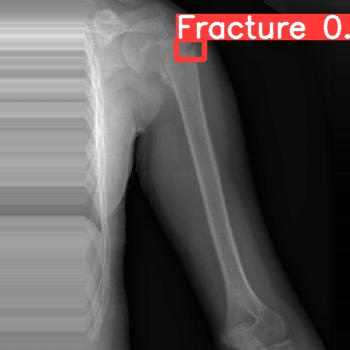

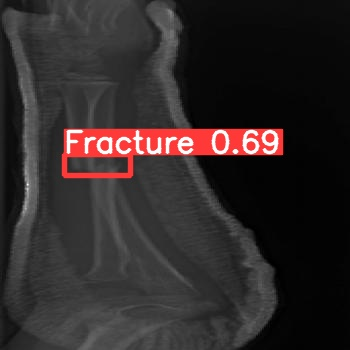

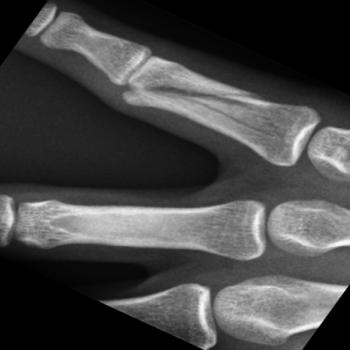

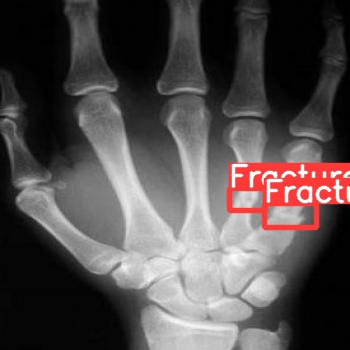

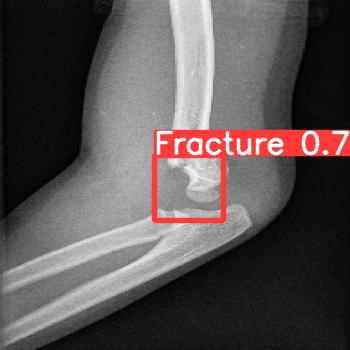

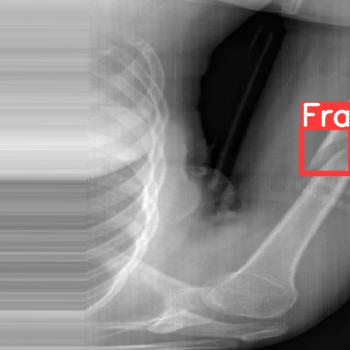

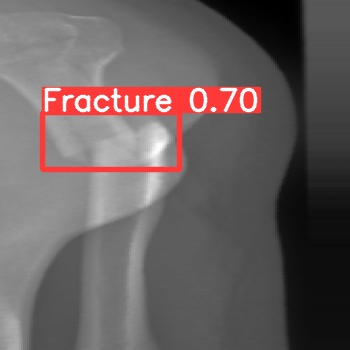

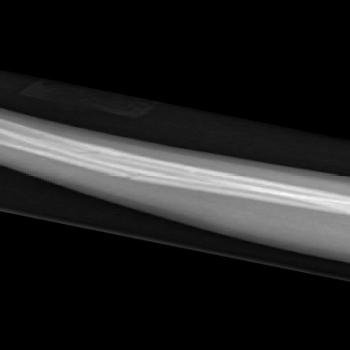

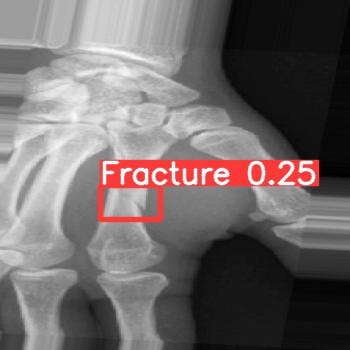

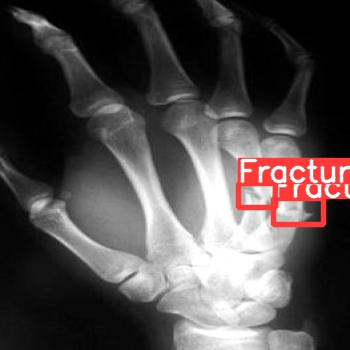

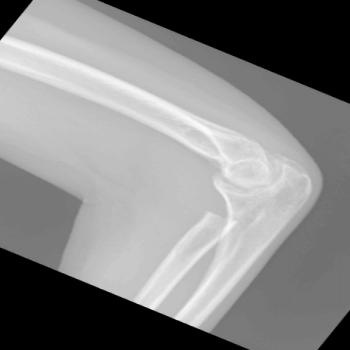

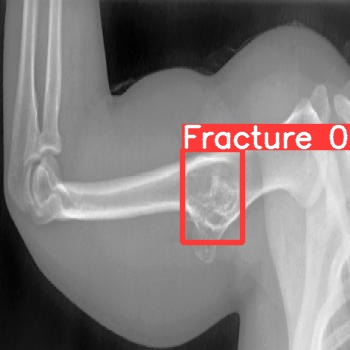

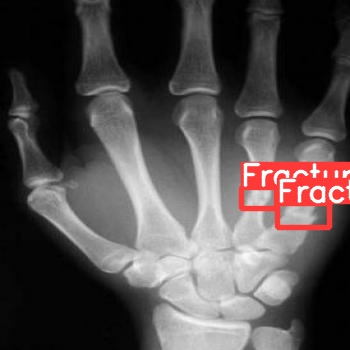

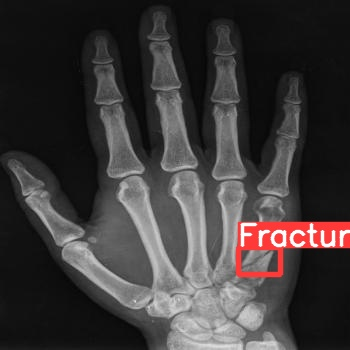

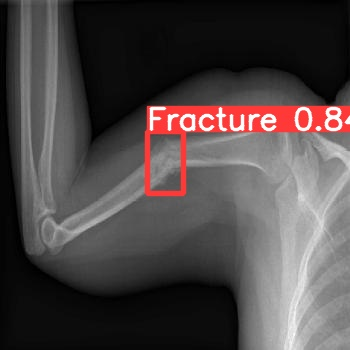

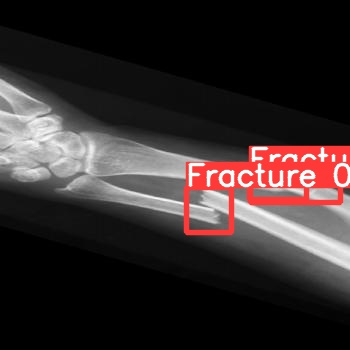

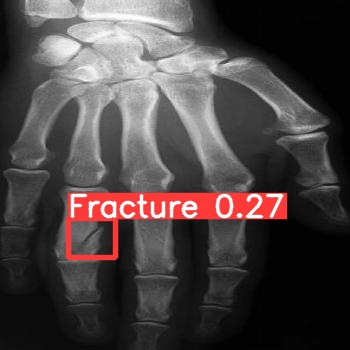

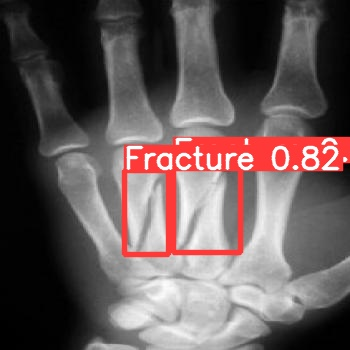

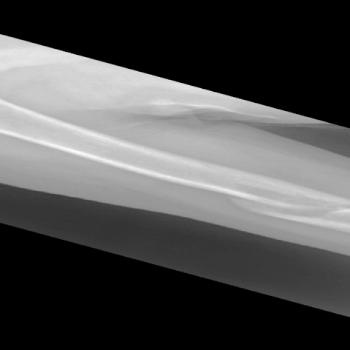

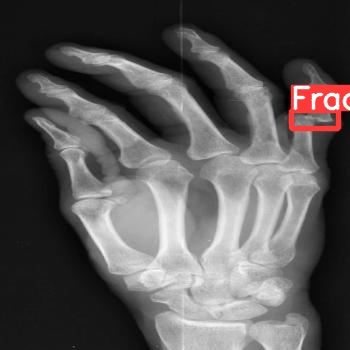

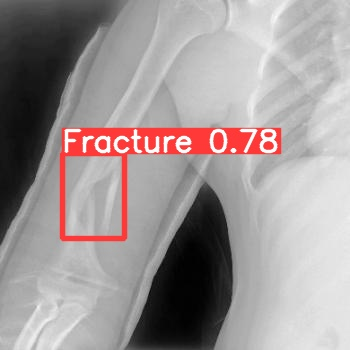

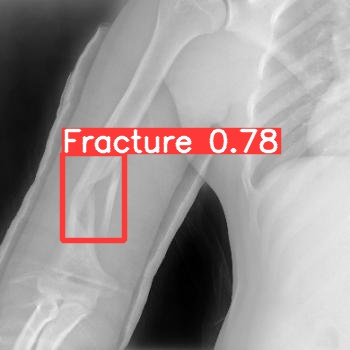

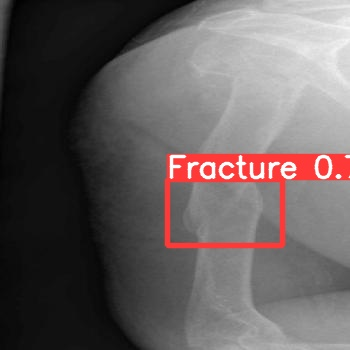

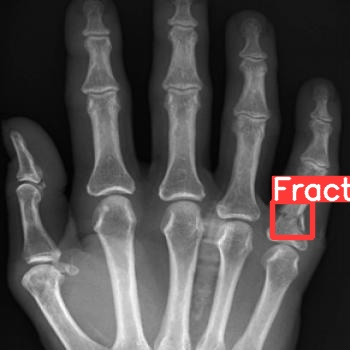

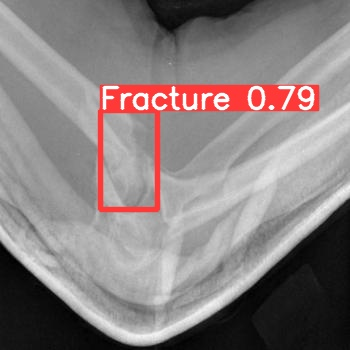

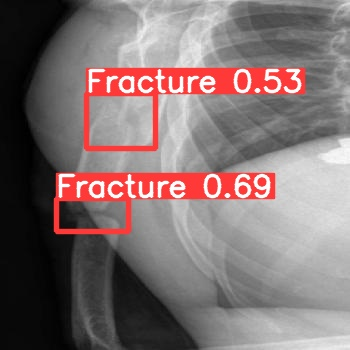

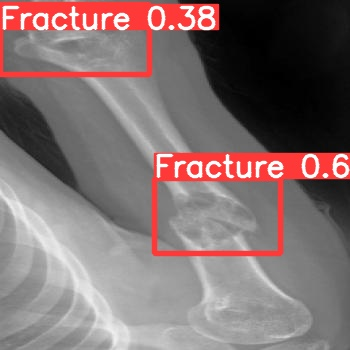

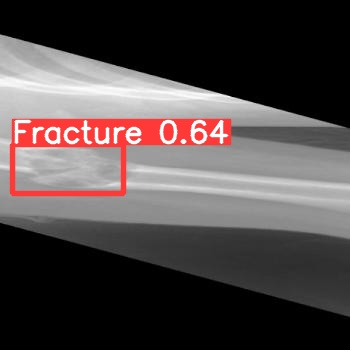

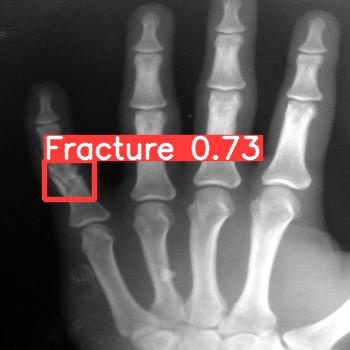

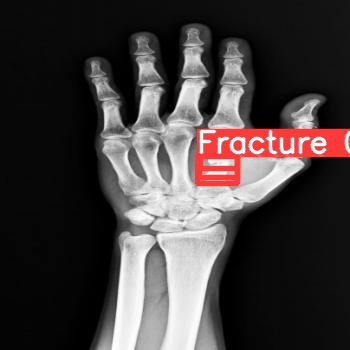

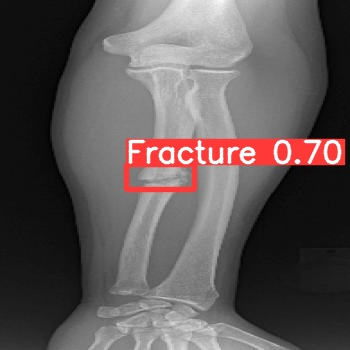

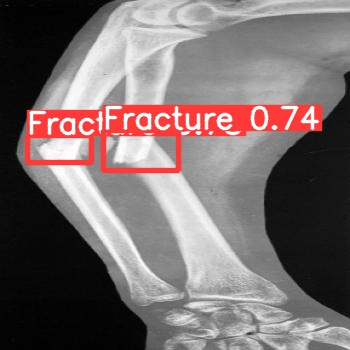

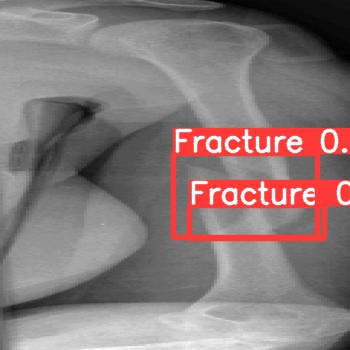

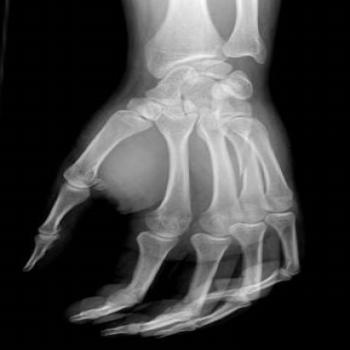

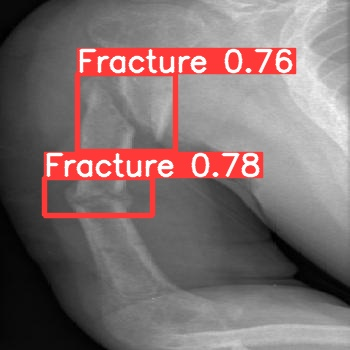

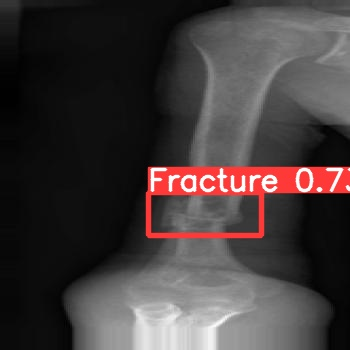

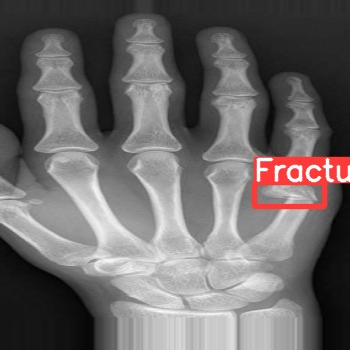

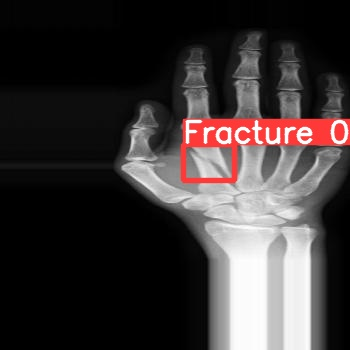

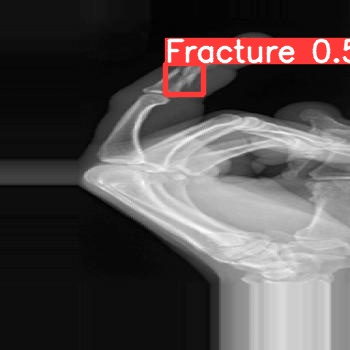

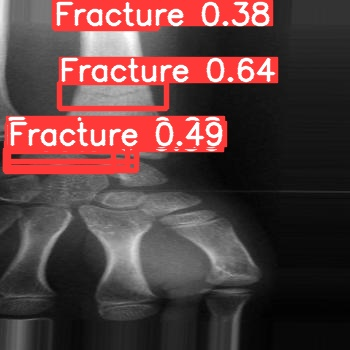

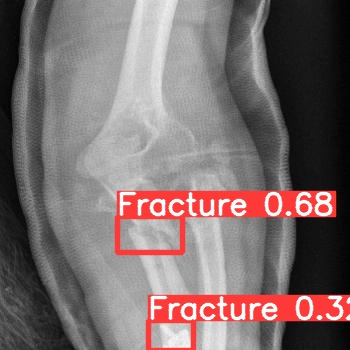

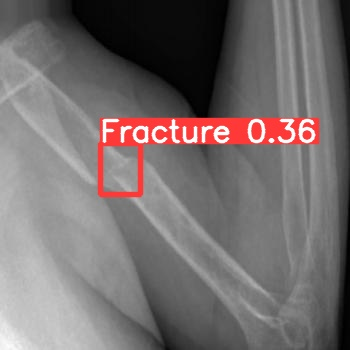

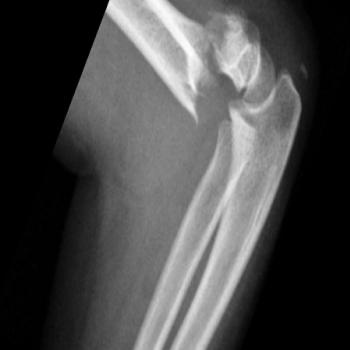

In [14]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:]:
  display(Image(filename=image_path,width=350))
  print('\n')